<a href="https://colab.research.google.com/github/Nawin03-DS/ML-Nootbook/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DAY-01**

**SIMPLE LINEAR REGRESSION**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('student_scores.csv') #read the dataset

In [ ]:
print(dataset.shape)
dataset.head()

(25, 2)


Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30

In [ ]:
dataset.describe()

Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000

In [ ]:
dataset.Hours.quantile(0.75)

np.float64(7.4)

In [ ]:
iqr = dataset.Hours.quantile(0.75) - dataset.Hours.quantile(0.25)
iqr
upper_threshold = dataset.Hours.quantile(0.75) + (1.5 * iqr) # > q3 + 1.5iqr
lower_threshold = dataset.Hours.quantile(0.25) - (1.5 * iqr) # < q1 - 1.5iqr
upper_threshold, lower_threshold

(np.float64(14.450000000000001), np.float64(-4.3500000000000005))

In [ ]:
#values greater than q3 + 1.5iqr -> outlier values less than q1 - 1.5iqr -> outlier
No skew in the data.


In [ ]:
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
dataset = dataset.drop_duplicates() # code to delete duplicates
dataset.shape

(25, 2)

In [ ]:
dataset.dtypes

Hours     float64
Scores      int64
dtype: object

Median and mean are closer to each other - there is less skew in the data

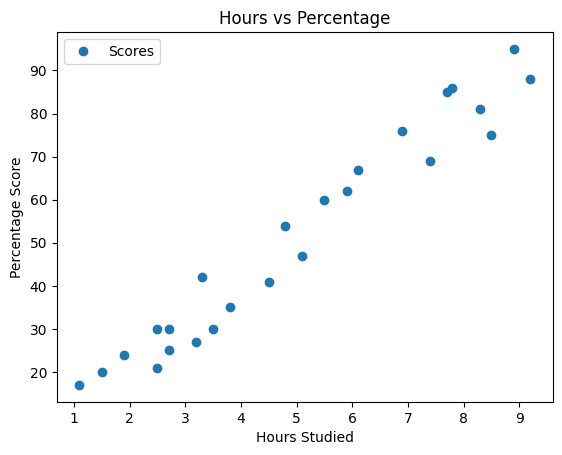

In [ ]:
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

1) Is there any relationship between the feature and target - Yes
 2) Is there any linear relationship between the feature and target - Yes
  3) No transformation is required

In [ ]:
dataset.corr() # correlation

Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000

There is a linear relationship between hours and score => we can go ahead and develop a linear regression model. No transformation required.

In [ ]:
dataset.Scores.values

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

# Preparing the data

In [ ]:
a = [1,2,3,4]
a[:-2]

[1, 2]

In [ ]:
#dataset.iloc[row_criteria,column_criteria]

In [ ]:
X = dataset.loc[:, ['Hours']].values # select all rows and select all columns except the last column as my feature
y = dataset.loc[:, 'Scores'].values # target as arrays
# Syntax : dataset.loc[:, :-1]
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 45)

In [ ]:
X, y

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86]))

In [ ]:
y_test

array([30, 30, 42, 85, 24, 86, 35])

In [ ]:
X_train.shape, X_test.shape

((18, 1), (7, 1))

# Normlising/Scaling the data

In [ ]:
# from sklearn.preprocessing import StandardScaler # importing the required function
# scaler = StandardScaler() #initialis
# scaler.fit(X_train) # find the values of mu and sigma
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test) #only transform the test dataset, dont fit it

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# shivaData = np.array([1.4,2.3,3.3,4,-4]).reshape(-1,1)
# scaler = MinMaxScaler()
# scaler.fit(shivaData)
# scaler.transform(shivaData)

In [ ]:
X_test

array([[2.5],
       [2.7],
       [3.3],
       [7.7],
       [1.9],
       [7.8],
       [3.8]])

# Modelling

In [ ]:
#Model for algorithm - score = (m * hours) + c

In [ ]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

In [ ]:
print(regressor.intercept_) # c

1.431512900311212


In [ ]:
print(regressor.coef_) # slope - m

# predicted score  = 9.72 * (hours) + 1.43

[9.72000803]


In [ ]:
regressor.predict([[12]]) # perils of extrapolations

array([118.07160928])

In [ ]:
#regressor.predict(scaler.transform(np.array([4]).reshape(-1,1)))

In [ ]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred

array([25.73153298, 27.67553458, 33.5075394 , 76.27557474, 19.89952816,
       77.24757554, 38.36754342])

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

Actual  Predicted
0      30  25.731533
1      30  27.675535
2      42  33.507539
3      85  76.275575
4      24  19.899528
5      86  77.247576
6      35  38.367543

In [ ]:
regressor.predict([[12],[11]]) # perils of extrapolation

array([118.07160928, 108.35160124])

In [ ]:
x = input()
x

# Metrics

In [ ]:
from sklearn import metrics # metrics will contain all the evaluation metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9347551352640703


# **Multiple Linear Regression**

In [ ]:
import pandas as pd
dataset = pd.read_csv('petrol_consumption.csv')

In [ ]:
dataset.head()
#dataset.describe()

Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
0         9.0            3571            1976                         0.525   
1         9.0            4092            1250                         0.572   
2         9.0            3865            1586                         0.580   
3         7.5            4870            2351                         0.529   
4         8.0            4399             431                         0.544   

   Petrol_Consumption  
0                 541  
1                 524  
2                 561  
3                 414  
4                 410

In [ ]:
dataset.shape

(48, 5)

In [ ]:
dataset.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [ ]:
dataset.dtypes

Petrol_tax                      float64
Average_income                    int64
Paved_Highways                    int64
Population_Driver_licence(%)    float64
Petrol_Consumption                int64
dtype: object

In [ ]:
dataset = dataset.drop_duplicates()

In [ ]:
dataset.describe()

Petrol_tax  Average_income  Paved_Highways  \
count   48.000000       48.000000       48.000000   
mean     7.668333     4241.833333     5565.416667   
std      0.950770      573.623768     3491.507166   
min      5.000000     3063.000000      431.000000   
25%      7.000000     3739.000000     3110.250000   
50%      7.500000     4298.000000     4735.500000   
75%      8.125000     4578.750000     7156.000000   
max     10.000000     5342.000000    17782.000000   

       Population_Driver_licence(%)  Petrol_Consumption  
count                     48.000000           48.000000  
mean                       0.570333          576.770833  
std                        0.055470          111.885816  
min                        0.451000          344.000000  
25%                        0.529750          509.500000  
50%                        0.564500          568.500000  
75%                        0.595250          632.750000  
max                        0.724000          968.000000

In [ ]:
iqr = dataset['Petrol_tax'].quantile(0.75) - dataset['Petrol_tax'].quantile(0.25)
upper_threshold = dataset['Petrol_tax'].quantile(0.75) + (1.5 * iqr)
lower_threshold = dataset['Petrol_tax'].quantile(0.25) - (1.5 * iqr)
print(upper_threshold, lower_threshold)
dataset.Petrol_tax = dataset.Petrol_tax.clip(lower_threshold, upper_threshold)

9.8125 5.3125


In [ ]:
iqr = dataset['Average_income'].quantile(0.75) - dataset['Average_income'].quantile(0.25)
upper_threshold = dataset['Average_income'].quantile(0.75) + (1.5 * iqr)
lower_threshold = dataset['Average_income'].quantile(0.25) - (1.5 * iqr)
print(upper_threshold, lower_threshold)
dataset.Average_income = dataset.Average_income.clip(lower_threshold, upper_threshold)

5838.375 2479.375


In [ ]:
iqr = dataset['Paved_Highways'].quantile(0.75) - dataset['Paved_Highways'].quantile(0.25)
upper_threshold = dataset['Paved_Highways'].quantile(0.75) + (1.5 * iqr)
lower_threshold = dataset['Paved_Highways'].quantile(0.25) - (1.5 * iqr)
print(upper_threshold, lower_threshold)
dataset.Paved_Highways = dataset.Paved_Highways.clip(lower_threshold, upper_threshold)

13224.625 -2958.375


In [ ]:
iqr = dataset['Population_Driver_licence(%)'].quantile(0.75) - dataset['Population_Driver_licence(%)'].quantile(0.25)
upper_threshold = dataset['Population_Driver_licence(%)'].quantile(0.75) + (1.5 * iqr)
lower_threshold = dataset['Population_Driver_licence(%)'].quantile(0.25) - (1.5 * iqr)
print(upper_threshold, lower_threshold)
dataset['Population_Driver_licence(%)'] = dataset['Population_Driver_licence(%)'].clip(lower_threshold, upper_threshold)

0.6934999999999998 0.4315000000000002


In [ ]:
dataset.describe()

Petrol_tax  Average_income  Paved_Highways  \
count   48.000000       48.000000       48.000000   
mean     7.670937     4241.833333     5450.442708   
std      0.923415      573.623768     3149.104278   
min      5.312500     3063.000000      431.000000   
25%      7.000000     3739.000000     3110.250000   
50%      7.500000     4298.000000     4735.500000   
75%      8.125000     4578.750000     7156.000000   
max      9.812500     5342.000000    13224.625000   

       Population_Driver_licence(%)  Petrol_Consumption  
count                     48.000000           48.000000  
mean                       0.569698          576.770833  
std                        0.053823          111.885816  
min                        0.451000          344.000000  
25%                        0.529750          509.500000  
50%                        0.564500          568.500000  
75%                        0.595250          632.750000  
max                        0.693500          968.000000

In [ ]:
dataset.shape

(48, 5)

# **EDA**

In [ ]:
dataset.groupby('Petrol_tax')['Petrol_Consumption'].mean()

Petrol_tax
5.3125    640.000000
6.0000    782.000000
6.5800    644.000000
7.0000    631.736842
7.5000    536.000000
8.0000    502.000000
8.5000    582.666667
9.0000    530.875000
9.8125    457.000000
Name: Petrol_Consumption, dtype: float64

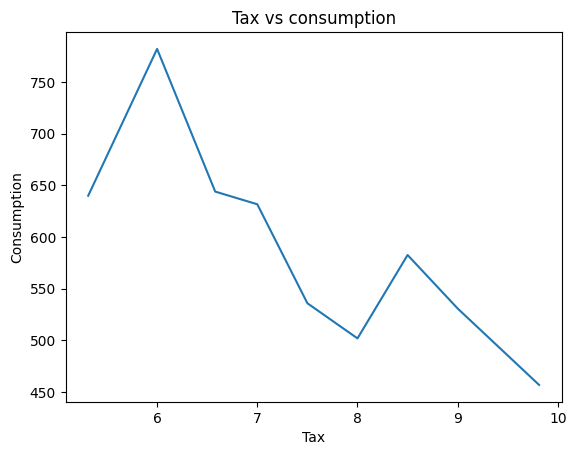

In [ ]:
dataset.groupby('Petrol_tax')['Petrol_Consumption'].mean().plot()
import matplotlib.pyplot as plt
#dataset.plot(x='Petrol_tax', y='Petrol_Consumption', style='o')
plt.title('Tax vs consumption')
plt.xlabel('Tax')
plt.ylabel('Consumption')
plt.show()

In [ ]:
dataset[['Petrol_tax','Petrol_Consumption']].corr()

Petrol_tax  Petrol_Consumption
Petrol_tax            1.000000           -0.455955
Petrol_Consumption   -0.455955            1.000000

1) There is a linear relationship between tax and consumption 2) As tax increases, comsumption decreases which is in-line with our GK 3) No transformation required - we can consider the feature for linear regression

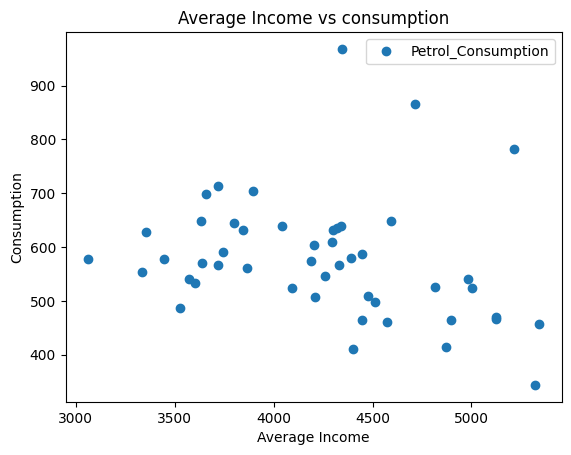

Average_income  Petrol_Consumption
Average_income            1.000000           -0.244862
Petrol_Consumption       -0.244862            1.000000

In [ ]:
dataset.plot(x='Average_income', y='Petrol_Consumption', style='o')
plt.title('Average Income vs consumption')
plt.xlabel('Average Income')
plt.ylabel('Consumption')
plt.show()
#dataset[['Average_income','Petrol_Consumption']].corr()
dataset[['Average_income','Petrol_Consumption']].corr()

1) There is a low linear relationshp between the data 2) No transformation reqd 3) The direction of relatiohsnip is not in-line with our GK

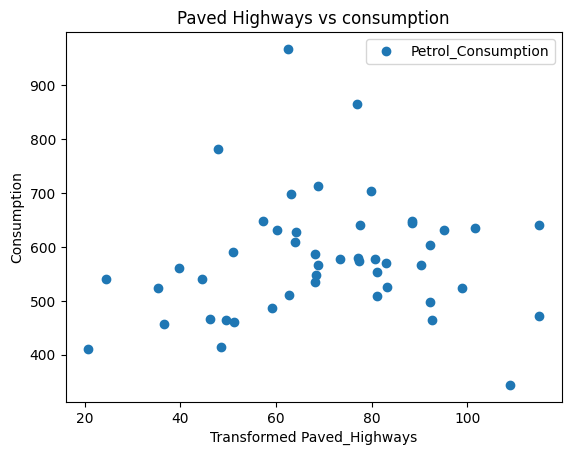

transformed  Petrol_Consumption
transformed            1.000000            0.084753
Petrol_Consumption     0.084753            1.000000

In [ ]:
import numpy as np
dataset['transformed'] = np.power(dataset['Paved_Highways'], 0.5) # transformation
dataset.plot(x='transformed', y='Petrol_Consumption', style='o')
plt.title('Paved Highways vs consumption')
plt.xlabel('Transformed Paved_Highways')
plt.ylabel('Consumption')
plt.show()
dataset[['transformed','Petrol_Consumption']].corr()

In [ ]:
del dataset['Paved_Highways']

1) There is no linear relationship between highways and consumption 2) Have tried all trasnformations - still not able to see a good linear relationship 3) Have decided to drop the feature

In [ ]:
#dataset['logPaved_Highways']  = np.log(dataset['Paved_Highways'])

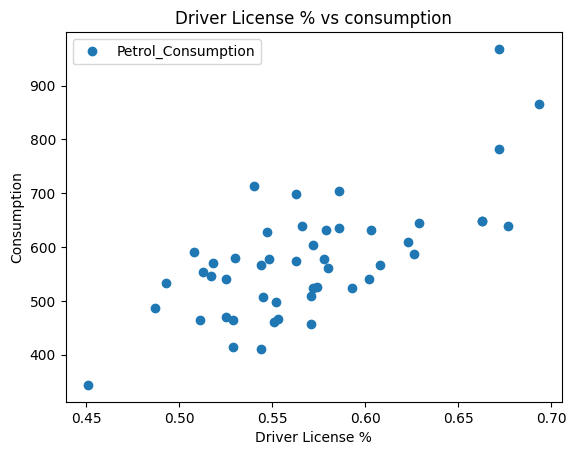

Population_Driver_licence(%)  Petrol_Consumption
Population_Driver_licence(%)                      1.000000            0.689301
Petrol_Consumption                                0.689301            1.000000

In [ ]:
dataset.plot(x='Population_Driver_licence(%)', y='Petrol_Consumption', style='o')
plt.title('Driver License % vs consumption')
plt.xlabel('Driver License %')
plt.ylabel('Consumption')
plt.show()
dataset[['Population_Driver_licence(%)','Petrol_Consumption']].corr()

1) High correlation between the data 2) No transformation reqd

In [ ]:
X = dataset[['Petrol_tax', 'Average_income', 'Population_Driver_licence(%)']].values #array of features
y = dataset['Petrol_Consumption'].values #array of targets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler ## standrard scalig
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data

# Model training

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,['Petrol_tax', 'Average_income',
       'Population_Driver_licence(%)'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df
# petrol_consumption = -21 *scaled_petrol_tax + -44 * scaled_avg_income +  63 * scaled_pop_driver + 559

Coefficient
Petrol_tax                     -28.406531
Average_income                 -39.652085
Population_Driver_licence(%)    73.908828

In [ ]:
regressor.predict(scaler.transform(np.array([[8, 3500, 0.5]])))

array([523.61877113])

In [ ]:
regressor.intercept_ # c

np.float64(589.5526315789475)

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

Actual   Predicted
0     524  548.142800
1     460  503.412392
2     574  562.316323
3     414  486.392997
4     566  646.422671
5     547  462.331469
6     541  519.797805
7     464  410.833410
8     410  522.244628
9     782  706.128870

In [ ]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.5864936341920117


# Feature Selection

# RFE

In [ ]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train_scaled, y_train)
list(zip(['Petrol_tax', 'Average_income', 'LogPaved_Highways',
       'Population_Driver_licence(%)'],selector.support_))

[('Petrol_tax', np.True_),
 ('Average_income', np.True_),
 ('LogPaved_Highways', np.True_)]

# Sequential Feature selection

In [ ]:
!pip install scikit-learn==0.24.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 69.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)
sfs.fit(X_train_scaled, y_train)
print(list(zip(['Petrol_tax', 'Average_income', 'LogPaved_Highways',
       'Population_Driver_licence(%)'],sfs.get_support())))

[('Petrol_tax', np.False_), ('Average_income', np.True_), ('LogPaved_Highways', np.True_)]


In [ ]:
list(zip([1,2,3],['a','b','c']))

[(1, 'a'), (2, 'b'), (3, 'c')]

In [ ]:
X_trans = sfs.transform(X)
X_trans # feature selection

array([[3.571e+03, 5.250e-01],
       [4.092e+03, 5.720e-01],
       [3.865e+03, 5.800e-01],
       [4.870e+03, 5.290e-01],
       [4.399e+03, 5.440e-01],
       [5.342e+03, 5.710e-01],
       [5.319e+03, 4.510e-01],
       [5.126e+03, 5.530e-01],
       [4.447e+03, 5.290e-01],
       [4.512e+03, 5.520e-01],
       [4.391e+03, 5.300e-01],
       [5.126e+03, 5.250e-01],
       [4.817e+03, 5.740e-01],
       [4.207e+03, 5.450e-01],
       [4.332e+03, 6.080e-01],
       [4.318e+03, 5.860e-01],
       [4.206e+03, 5.720e-01],
       [3.718e+03, 5.400e-01],
       [4.716e+03, 6.935e-01],
       [4.341e+03, 6.770e-01],
       [4.593e+03, 6.630e-01],
       [4.983e+03, 6.020e-01],
       [4.897e+03, 5.110e-01],
       [4.258e+03, 5.170e-01],
       [4.574e+03, 5.510e-01],
       [3.721e+03, 5.440e-01],
       [3.448e+03, 5.480e-01],
       [3.846e+03, 5.790e-01],
       [4.188e+03, 5.630e-01],
       [3.601e+03, 4.930e-01],
       [3.640e+03, 5.180e-01],
       [3.333e+03, 5.130e-01],
       [

# Cross Validation

In [ ]:
from sklearn.model_selection import cross_validate
regressor = LinearRegression(normalize = True) #untrained model

TypeError: LinearRegression.__init__() got an unexpected keyword argument 'normalize'

In [ ]:
cv_results = cross_validate(regressor, X, y, cv=10, scoring = "r2")
cv_results['test_score'].mean()

np.float64(-0.13664886940858784)

# **Ridge Regression**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler # Import StandardScaler

# Since the data is already scaled as X_train_scaled and y_train is not scaled,
# we will perform cross-validation on the scaled training data.
# Note: If performing cross-validation directly on X and y,
# it's best practice to use a Pipeline that includes scaling within the cross-validation loop.
# However, based on the user's previous code structure, we'll adapt to use the already scaled data.
# If you want to cross-validate on the original X and y, wrap the scaler and regressor in a Pipeline.

# Use the already scaled training data (X_train_scaled, y_train) for cross-validation
# Note: cross_validate expects the full dataset for CV splits, so we should ideally use X_scaled and y.
# Let's scale the full X data first for correct cross-validation.

scaler_cv = StandardScaler()
X_scaled = scaler_cv.fit_transform(X) # Scale the full dataset for CV

for alpha in [0.001,0.002,0.003,0.005,0.01,0.02,0.03,0.04,0.1,0.2,0.5,1]:
  # Remove normalize=True as it's not accepted by Ridge.__init__
  regressor = Ridge(alpha = alpha)
  # Perform cross-validation on the scaled full dataset X_scaled
  cv_results = cross_validate(regressor, X_scaled, y, cv=5, scoring = "r2" , return_train_score=True)
  print(f"Alpha : {alpha}, Test R2: {cv_results['test_score'].mean():.4f}, Train R2: {cv_results['train_score'].mean():.4f}")

Alpha : 0.001, Test R2: 0.1548, Train R2: 0.6603
Alpha : 0.002, Test R2: 0.1548, Train R2: 0.6603
Alpha : 0.003, Test R2: 0.1548, Train R2: 0.6603
Alpha : 0.005, Test R2: 0.1549, Train R2: 0.6603
Alpha : 0.01, Test R2: 0.1549, Train R2: 0.6603
Alpha : 0.02, Test R2: 0.1551, Train R2: 0.6603
Alpha : 0.03, Test R2: 0.1553, Train R2: 0.6603
Alpha : 0.04, Test R2: 0.1555, Train R2: 0.6603
Alpha : 0.1, Test R2: 0.1566, Train R2: 0.6603
Alpha : 0.2, Test R2: 0.1583, Train R2: 0.6603
Alpha : 0.5, Test R2: 0.1634, Train R2: 0.6602
Alpha : 1, Test R2: 0.1709, Train R2: 0.6598


**Logistic Linear Regression**

In [ ]:
import pandas as pd # handle the data
from sklearn.model_selection import train_test_split # split the data

from sklearn import metrics # evaluation metrics
import seaborn as sn # plotting the data
import matplotlib.pyplot as plt # plotting the data

In [ ]:
import pandas as pd
candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }

df = pd.DataFrame(candidates,columns= ['gmat', 'gpa','work_experience','admitted'])
print (df)

    gmat  gpa  work_experience  admitted
0    780  4.0                3         1
1    750  3.9                4         1
2    690  3.3                3         0
3    710  3.7                5         1
4    680  3.9                4         0
5    730  3.7                6         1
6    690  2.3                1         0
7    720  3.3                4         1
8    740  3.3                5         1
9    690  1.7                1         0
10   610  2.7                3         0
11   690  3.7                5         1
12   710  3.7                6         1
13   680  3.3                4         0
14   770  3.3                3         1
15   610  3.0                1         0
16   580  2.7                4         0
17   650  3.7                6         1
18   540  2.7                2         0
19   590  2.3                3         0
20   620  3.3                2         1
21   600  2.0                1         0
22   550  2.3                4         0
23   550  2.7   

In [ ]:
df.isnull().sum()

gmat               0
gpa                0
work_experience    0
admitted           0
dtype: int64

In [ ]:
df.describe()

gmat        gpa  work_experience   admitted
count   40.000000  40.000000        40.000000  40.000000
mean   654.000000   3.095000         3.425000   0.475000
std     61.427464   0.631218         1.737778   0.505736
min    540.000000   1.700000         1.000000   0.000000
25%    607.500000   2.700000         2.000000   0.000000
50%    660.000000   3.300000         4.000000   0.000000
75%    690.000000   3.700000         5.000000   1.000000
max    780.000000   4.000000         6.000000   1.000000

In [ ]:
UL = 690 + 1.5*(83)
UL

814.5

In [ ]:
LL = 607-1.5*(83)
LL

482.5

In [ ]:
df.dtypes

gmat                 int64
gpa                float64
work_experience      int64
admitted             int64
dtype: object

In [ ]:
df = df.drop_duplicates()

**EDA**

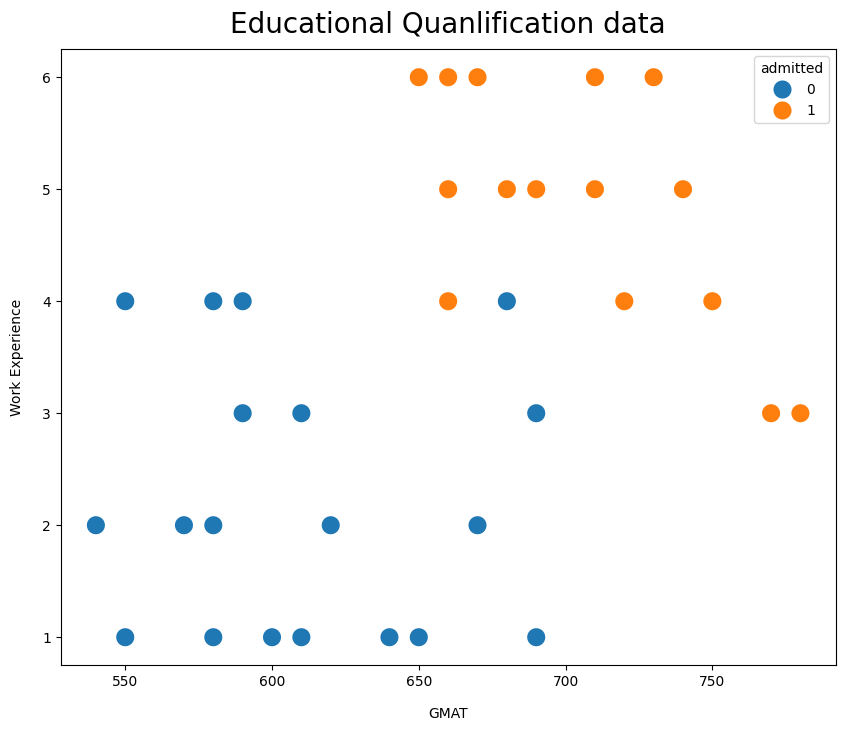

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.scatterplot(x='gmat', y='work_experience', hue='admitted', data=df, s=200)
plt.title("Educational Quanlification data", y=1.015, fontsize=20)
plt.xlabel("GMAT", labelpad=13)
plt.ylabel("Work Experience", labelpad=13)
ax = plt.gca()

1) High GMAT and high Work experience = > admitted 2) there is a lienar decision boundary =? good to go with LR model

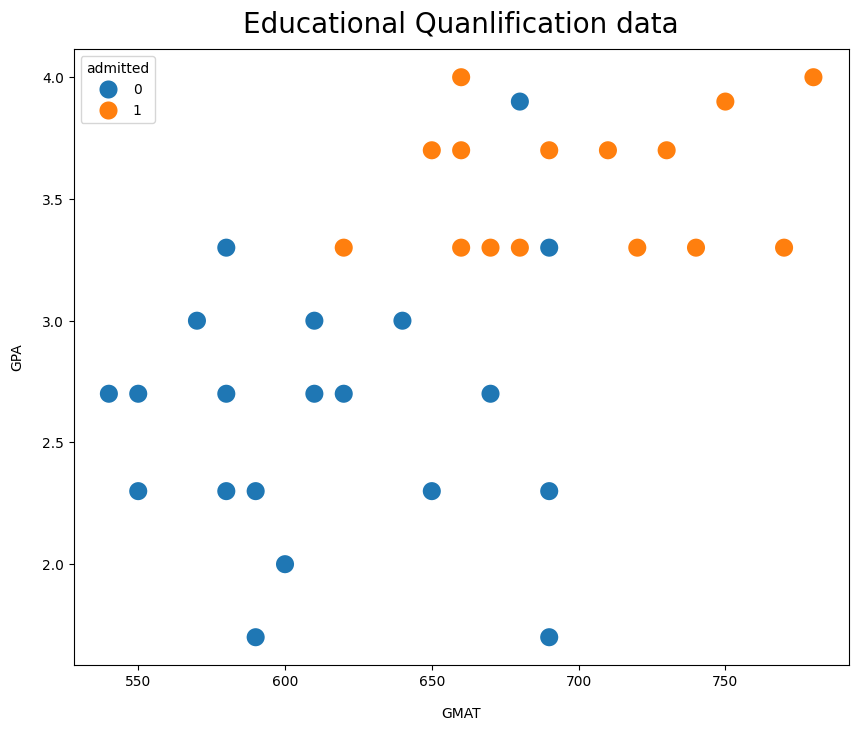

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.scatterplot(x='gmat', y='gpa', hue='admitted', data=df, s=200)
plt.title("Educational Quanlification data", y=1.015, fontsize=20)
plt.xlabel("GMAT", labelpad=13)
plt.ylabel("GPA", labelpad=13)
ax = plt.gca()

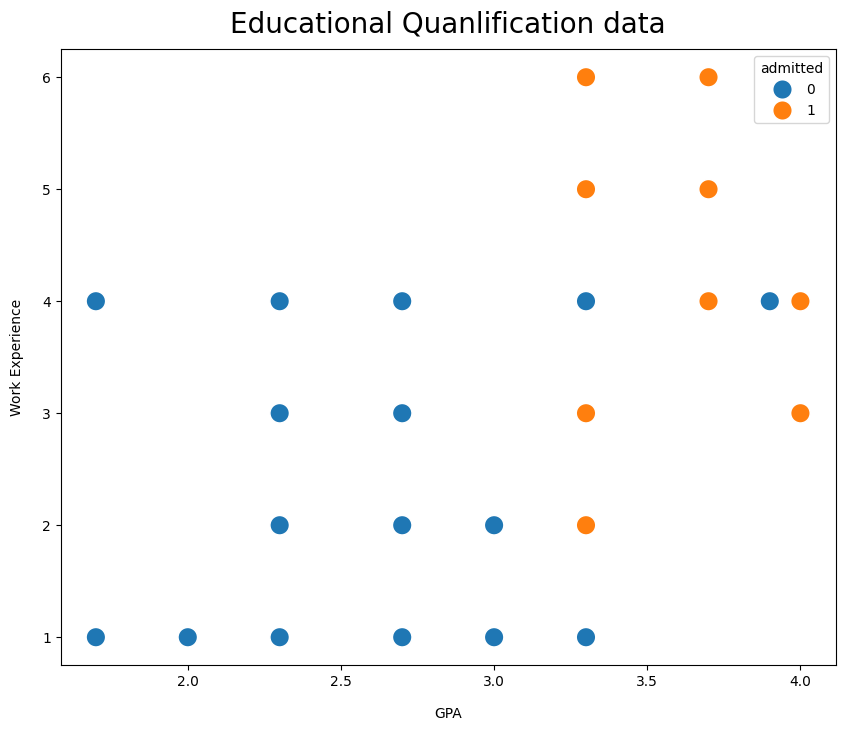

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='gpa', y='work_experience', hue='admitted', data=df, s=200)
plt.title("Educational Quanlification data", y=1.015, fontsize=20)
plt.xlabel("GPA", labelpad=13)
plt.ylabel("Work Experience", labelpad=13)
ax = plt.gca()

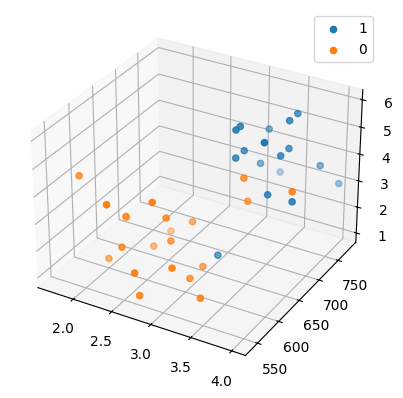

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for s in df.admitted.unique():
    ax.scatter(df.gpa[df.admitted==s],df.gmat[df.admitted==s],df['work_experience'][df.admitted==s],label=s)

ax.legend()

1) When we look at the 3d plot, all the points in the top right are blue and all points in bottom left are orange => there is a clear linear decision boundary

2) No transfomration required

3) People with more gpa, gmat, work experience are more likely to get admitted => In line with our GK

# Data Jar

In [ ]:
X = df[['gmat', 'gpa','work_experience']].values # fts
y = df['admitted'].values # target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0) # train- test split

In [ ]:
y_train

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1])

# Model

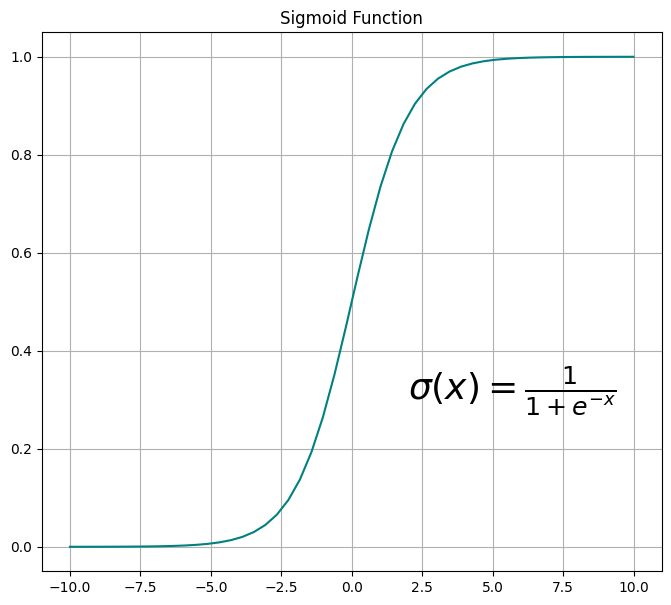

In [ ]:
import numpy as np

def sigmoid(x):
  return(1/(1 + np.exp(-x)))

x_values_for_sigmoid = np.linspace(-10, 10)
plt.figure(figsize=(8, 7))
plt.plot(x_values_for_sigmoid, sigmoid(x_values_for_sigmoid), c='teal')
plt.title('Sigmoid Function')
plt.grid(True)
plt.text(2, 0.3, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=26)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression #main code that build the LR model
logistic_regression= LogisticRegression() #initialise the required package
logistic_regression.fit(X_train,y_train) #magic happens - best values of betas - training/learning happens here
y_pred=logistic_regression.predict(X_test)

#logistic_regression.coef_
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0])

In [ ]:
logistic_regression.predict([[480, 2.5, 1]])

array([0])

In [ ]:
logistic_regression.predict_proba([[760,3.8,5]])

array([[0.00582955, 0.99417045]])

In [ ]:
logistic_regression.predict_proba([[755,3.8,5]])

array([[0.0071234, 0.9928766]])

In [ ]:
logistic_regression.predict_proba(X_test)

array([[0.9935881 , 0.0064119 ],
       [0.99361808, 0.00638192],
       [0.9762945 , 0.0237055 ],
       [0.99808928, 0.00191072],
       [0.09230075, 0.90769925],
       [0.98890361, 0.01109639],
       [0.55070919, 0.44929081],
       [0.97782788, 0.02217212],
       [0.06641167, 0.93358833],
       [0.59546603, 0.40453397]])

In [ ]:
logistic_regression.coef_

array([[0.04034928, 0.28657862, 1.27891901]])

In [ ]:
logistic_regression.intercept_

array([-33.01007646])

y = 1/(1 + exp(-0.04 * gmat -0.28 * gpa - 1.27 * wexp + 33))

# Evaluation Metric

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score
#logistic_regression.score(X_test,y_test) # accuracy
confusion_matrix(y_test,y_pred)
f1_score(y_test,y_pred) # f1 score
#logistic_regression.score(X_test,y_test)
#plot_roc_curve(logistic_regression, X_test, y_test) #AUROC
#accuracy_score(y_test,y_pred) #accuracy
roc_auc_score(y_test,y_pred)

np.float64(0.75)

# **KNN and visualising decision boundaries**

In [ ]:
![knn.png]

# **Performance of K for various types of datasets**

In [ ]:
!pip install mlxtend==0.22.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.0 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.23.4
    Uninstalling mlxtend-0.23.4:
      Successfully uninstalled mlxtend-0.23.4


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
#from sklearn import datasets, neighbors
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions # used to plot the decision boundary of ml algorithms
from sklearn.model_selection import cross_val_score # import all the functions reqd for cross validation
from sklearn.model_selection import train_test_split

In [ ]:
data1 = pd.read_csv('ushape.csv')
#data1
data1.rename(columns={'3.159499363321345566e-02':'X','9.869877579082642072e-01':'Y','0.000000000000000000e+00':'class'},inplace=True)

In [ ]:
#Input :  k and data
#Output : The graph of the decision boundary
def knn_comparison(data, k): #k and the data are input to the function
  x = data[['X','Y']].values # independent features
  y = data['class'].astype(int).values # y -> target/true labels
  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  x_train = scaler.fit_transform(x_train)
  x_test = scaler.transform(x_test)

  # Ensure k is not greater than the number of training samples
  if k > len(x_train):
      k = len(x_train) -1
      if k < 1: # Ensure k is at least 1
          k = 1

  knn = KNeighborsClassifier(n_neighbors=k) #it will initialise the model with @neighbours as k
  knn.fit(x_train, y_train) # train the model
  print("Train Accuracy : ", knn.score(x_train,y_train)) # test the model and it computes the accuracy (train data accuracy)

  # Adjust cv based on the size of the training data
  n_samples_train = len(x_train)
  cv_value = min(10, n_samples_train) if n_samples_train > 1 else 1 # Use at most 10 splits, and at least 1 if possible
  # Further adjust cv if the minimum class size is less than the current cv_value
  unique_classes, class_counts = np.unique(y_train, return_counts=True)
  min_class_size = min(class_counts) if len(class_counts) > 0 else 0
  cv_value = min(cv_value, min_class_size) if min_class_size > 1 else 1


  if cv_value > 1:
      print("Val Accuracy : ", np.mean(cross_val_score(knn, x_train, y_train, cv=cv_value)))
  else:
      print("Val Accuracy : Not enough samples or a single class for cross-validation")


  # Plotting decision region
  plot_decision_regions(x_train, y_train, clf = knn, legend=2) # it plots the decision boundary
  ##Adding axes annotations
  plt.xlabel('X') #Names the x-axis
  plt.ylabel('Y') #Names the y-axis
  plt.title('Knn with K='+ str(k)) #Names the graph
  plt.show() #Displays the graph

def knn_no_plot(data, k): #k and the data are input to the function
  x = data[['X','Y']].values # independent features
  y = data['class'].astype(int).values # y -> target/true labels

  # Ensure k is not greater than the number of samples
  if k > len(x):
      k = len(x) -1
      if k < 1: # Ensure k is at least 1
          k = 1

  clf = KNeighborsClassifier(n_neighbors=k) #it will initialise the model with @neighbours as k
  clf.fit(x, y) # train the model

  # Adjust cv based on the size of the data
  n_samples = len(x)
  cv_value = min(5, n_samples) if n_samples > 1 else 1 # Use at most 5 splits, and at least 1 if possible
  # Further adjust cv if the minimum class size is less than the current cv_value
  unique_classes, class_counts = np.unique(y, return_counts=True)
  min_class_size = min(class_counts) if len(class_counts) > 0 else 0
  cv_value = min(cv_value, min_class_size) if min_class_size > 1 else 1


  print("K : ", k, " Train Accuracy : ", clf.score(x,y))  # test the model and it computes the accuracy (train data accuracy)
  if cv_value > 1:
      print("Val Accuracy : ", np.mean(cross_val_score(clf, x, y, cv=cv_value)))
  else:
      print("Val Accuracy : Not enough samples or a single class for cross-validation")

  # Plotting decision region
  # plot_decision_regions(x, y, clf=clf, legend=2) # it plots the decision boundary
  # # Adding axes annotations
  # plt.xlabel('X') #Names the x-axis
  # plt.ylabel('Y') #Names the y-axis
  # plt.title('Knn with K='+ str(k)) #Names the graph
  # plt.show() #Displays the graph

#Same as aboe, but with logreg
def logistic(data, k = 0):
  x = data[['X','Y']].values
  y = data['class'].astype(int).values
  clf = LogisticRegression()
  clf.fit(x, y)
  print(clf.score(x,y))
  print("Train Accuracy : ", clf.score(x,y)) # test the model and it computes the accuracy (train data accuracy)

  # Adjust cv based on the size of the data
  n_samples = len(x)
  cv_value = min(5, n_samples) if n_samples > 1 else 1 # Use at most 5 splits, and at least 1 if possible
  # Further adjust cv if the minimum class size is less than the current cv_value
  unique_classes, class_counts = np.unique(y, return_counts=True)
  min_class_size = min(class_counts) if len(class_counts) > 0 else 0
  cv_value = min(cv_value, min_class_size) if min_class_size > 1 else 1

  if cv_value > 1:
      print("Val Accuracy : ", np.mean(cross_val_score(clf, x, y, cv=cv_value)))
  else:
      print("Val Accuracy : Not enough samples for cross-validation")

  # Plotting decision region
  plot_decision_regions(x, y, clf=clf, legend=2)
  # Adding axes annotations
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.title('Losgistic Regression decision boundary')
  plt.show()

1
Train Accuracy :  1.0
Val Accuracy :  0.9228571428571429


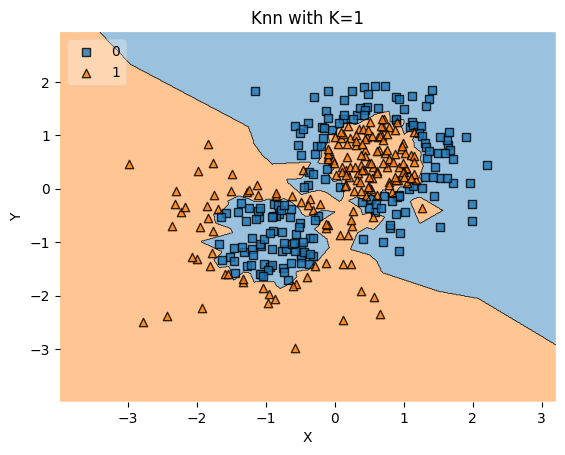

2
Train Accuracy :  0.9457142857142857
Val Accuracy :  0.8914285714285715


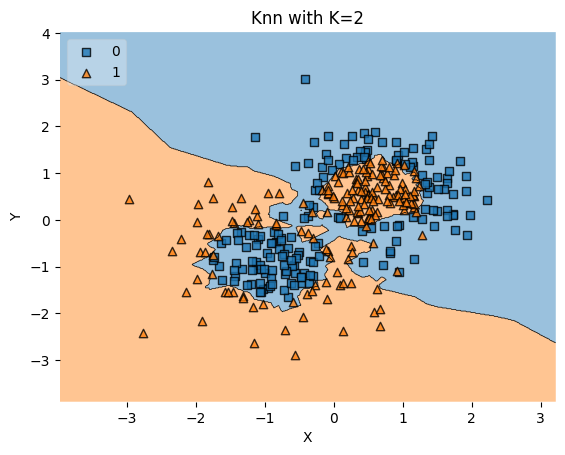

3
Train Accuracy :  0.9314285714285714
Val Accuracy :  0.8942857142857141


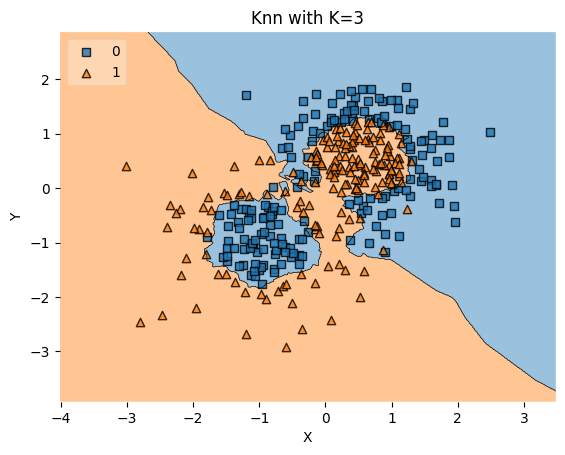

4
Train Accuracy :  0.9314285714285714
Val Accuracy :  0.8942857142857144


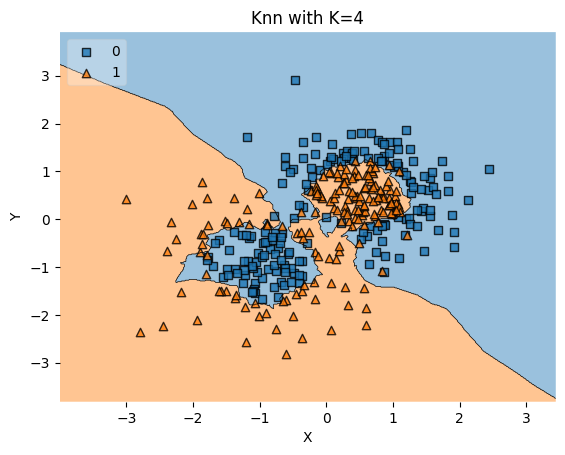

5
Train Accuracy :  0.9228571428571428
Val Accuracy :  0.8800000000000001


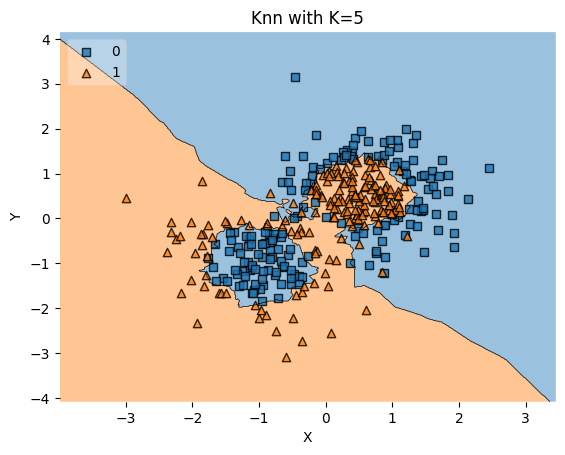

20
Train Accuracy :  0.8285714285714286
Val Accuracy :  0.797142857142857


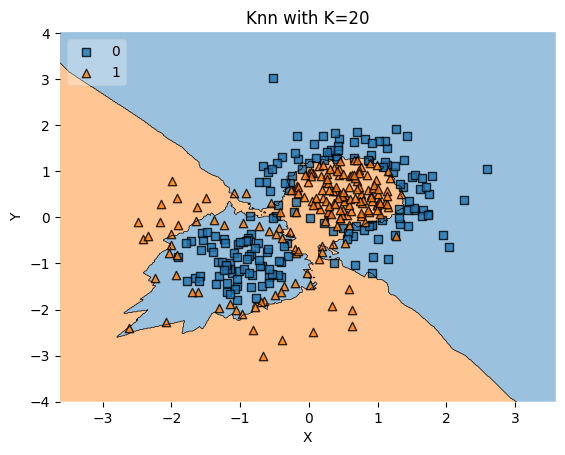

30
Train Accuracy :  0.8257142857142857
Val Accuracy :  0.7685714285714286


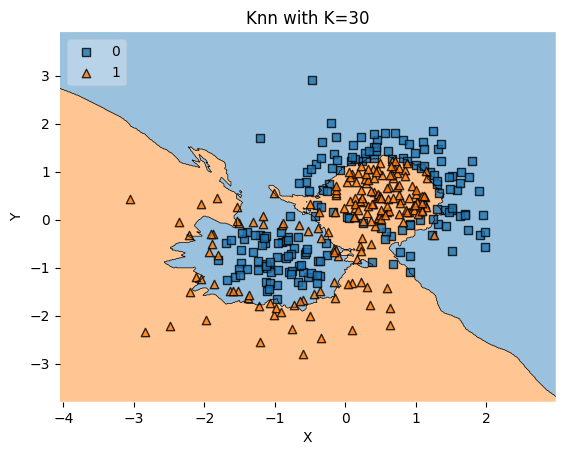

50
Train Accuracy :  0.74
Val Accuracy :  0.7171428571428572


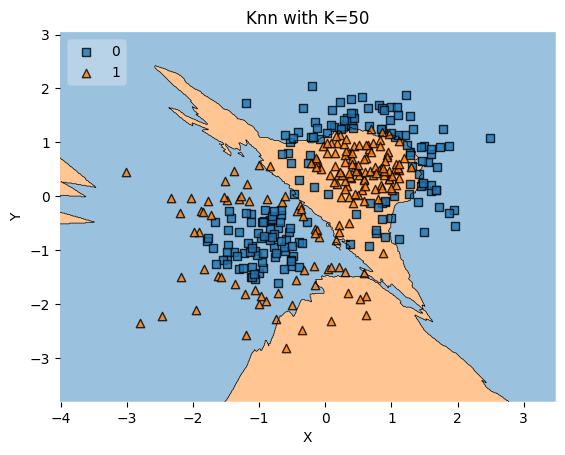

80
Train Accuracy :  0.58
Val Accuracy :  0.5685714285714286


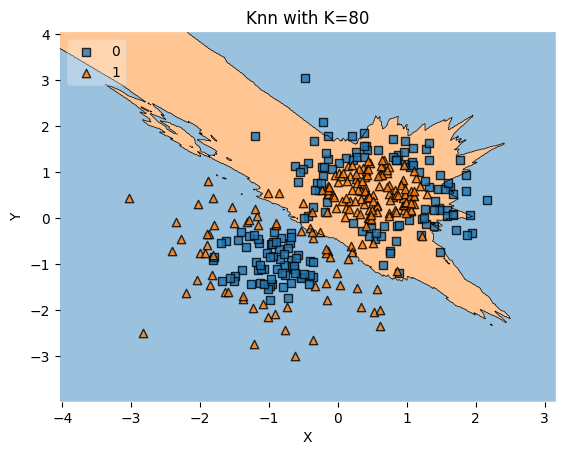

In [ ]:
for i in [1,2,3,4,5,20,30,50,80]:
  print(i)
  knn_comparison(data1,i)

In [ ]:
for i in [1,2,3,4,5,20,30,40,80]:
  print(i)
  knn_no_plot(data1,i)

1
K :  1  Train Accuracy :  1.0  Val Accuracy :  0.9400000000000001
2
K :  2  Train Accuracy :  0.9494949494949495  Val Accuracy :  0.9394736842105263
3
K :  3  Train Accuracy :  0.9595959595959596  Val Accuracy :  0.95
4
K :  4  Train Accuracy :  0.9595959595959596  Val Accuracy :  0.9400000000000001
5
K :  5  Train Accuracy :  0.9595959595959596  Val Accuracy :  0.95
20
K :  20  Train Accuracy :  0.9292929292929293  Val Accuracy :  0.9099999999999999
30
K :  30  Train Accuracy :  0.9191919191919192  Val Accuracy :  0.8589473684210527
40
K :  40  Train Accuracy :  0.8888888888888888  Val Accuracy :  0.8189473684210526
80
K :  80  Train Accuracy :  0.7272727272727273  Val Accuracy :  nan


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 144, in __call__
    score = scorer(estimator, *args, **routed_params.get(name).score)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 472, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py", line 446, in score
    return super().score(X, y, sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 572, in score
    return accuracy_score(y, self.predict(X), sample_

# U shaped

In [ ]:
data1.columns

Index(['X', 'Y', 'class'], dtype='object')

In [ ]:
data1['class']

0     1.0
1     0.0
2     1.0
3     1.0
4     1.0
     ... 
94    1.0
95    1.0
96    1.0
97    0.0
98    0.0
Name: class, Length: 99, dtype: float64

K value  :  1  train score :  1.0  cv score :  0.857142857142857
K value  :  2  train score :  0.9420289855072463  cv score :  0.8428571428571427
K value  :  3  train score :  0.9420289855072463  cv score :  0.9285714285714286
K value  :  4  train score :  0.9420289855072463  cv score :  0.9285714285714286
K value  :  5  train score :  0.9710144927536232  cv score :  0.9285714285714286
K value  :  6  train score :  0.9420289855072463  cv score :  0.9142857142857143
K value  :  7  train score :  0.9420289855072463  cv score :  0.9142857142857143
K value  :  8  train score :  0.927536231884058  cv score :  0.9142857142857143
K value  :  9  train score :  0.9420289855072463  cv score :  0.9428571428571428
K value  :  10  train score :  0.9420289855072463  cv score :  0.9285714285714286
K value  :  20  train score :  0.855072463768116  cv score :  0.769047619047619
K value  :  50  train score :  0.7391304347826086  cv score :  0.7119047619047618


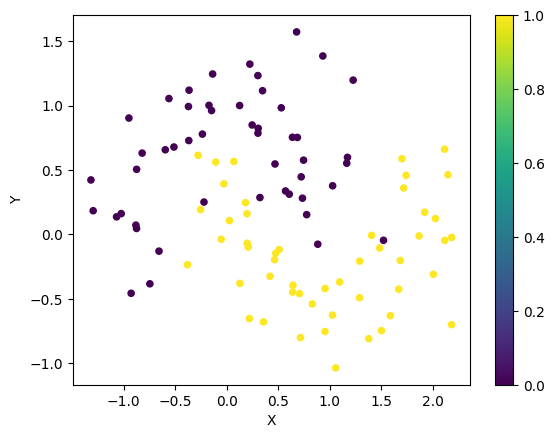

In [ ]:
data1.plot(x='X', y='Y', c=data1['class'], kind='scatter', colormap='viridis')
X = data1[['X','Y']].values
y = data1['class'].values
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(3)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)


for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(x_train,y_train) # training the model
  print("K value  : " , i, " train score : ", knn.score(x_train,y_train) , " cv score : ", np.mean(cross_val_score(knn, x_train, y_train, cv=10))) #predicting using the model


# knn = KNeighborsClassifier(3)
# knn.fit(x_train,y_train)
# #knn.predict(scaler.transform([[0.6,-0.4]]))
# print(knn.predict(scaler.transform([[3,-2]])))
# #knn.score(x_test,y_test)

In [ ]:
data1 = pd.read_csv('ushape.csv')
for i in [1,2,3,4,5,20,30,40,80]: #hit n trial
  knn_no_plot(data1,i)

# Concentric Circles

Train Accuracy :  1.0
Val Accuracy :  0.8714285714285716


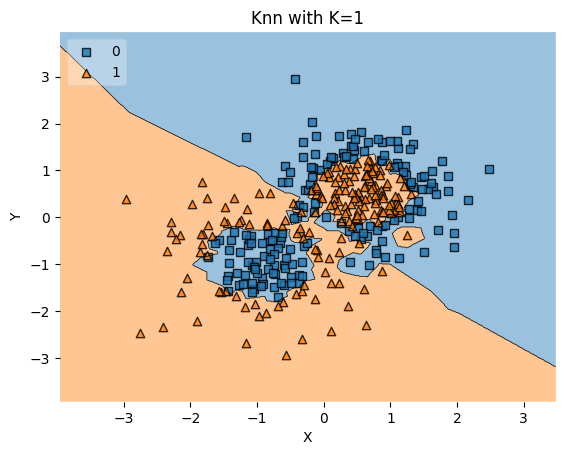

Train Accuracy :  0.9485714285714286
Val Accuracy :  0.8657142857142859


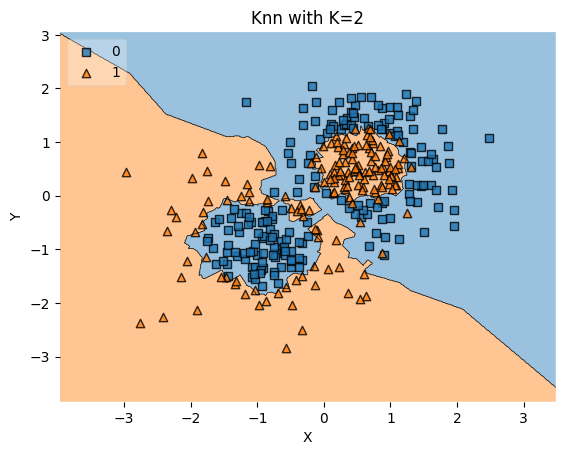

Train Accuracy :  0.9371428571428572
Val Accuracy :  0.8514285714285714


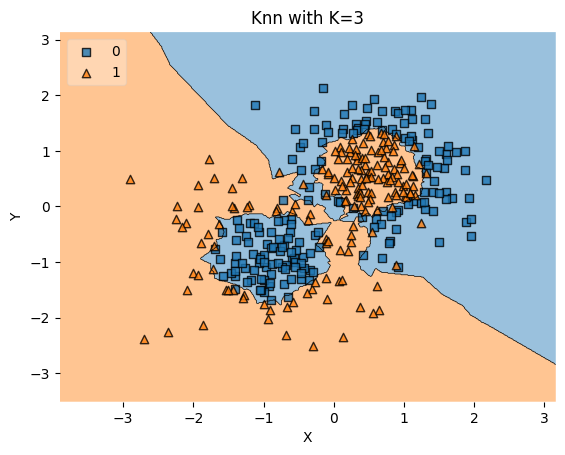

Train Accuracy :  0.9371428571428572
Val Accuracy :  0.8914285714285715


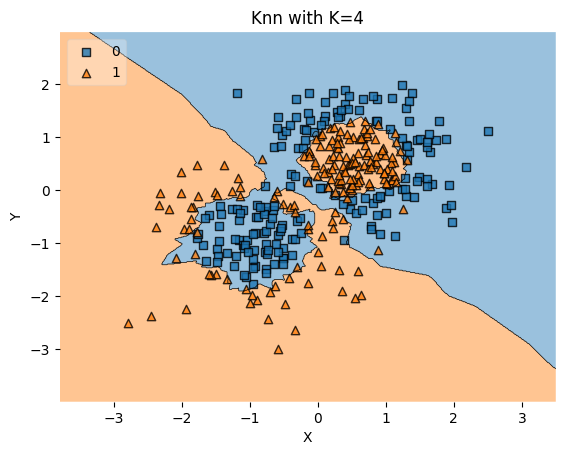

Train Accuracy :  0.9371428571428572
Val Accuracy :  0.8657142857142859


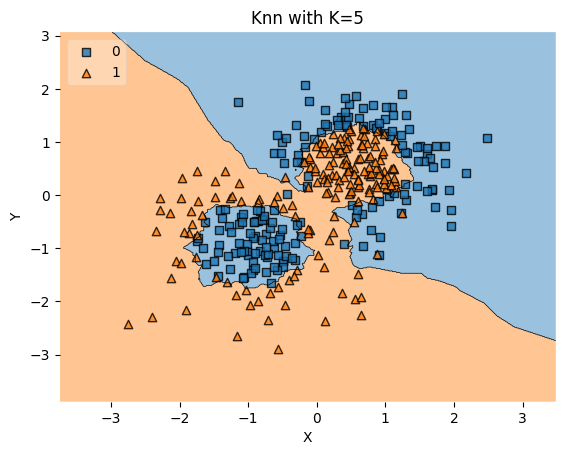

Train Accuracy :  0.9228571428571428
Val Accuracy :  0.8714285714285716


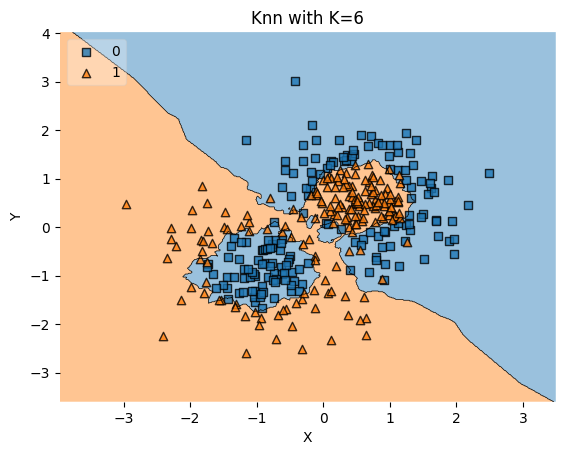

Train Accuracy :  0.9342857142857143
Val Accuracy :  0.8857142857142856


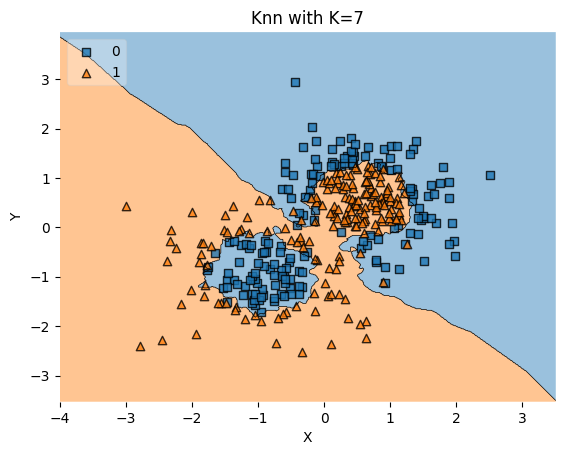

Train Accuracy :  0.8885714285714286
Val Accuracy :  0.8400000000000001


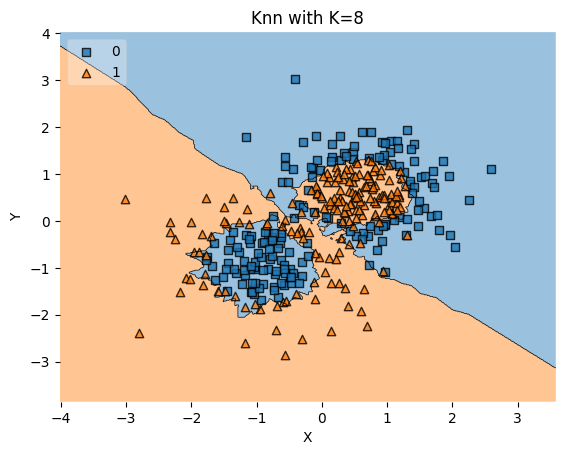

Train Accuracy :  0.9057142857142857
Val Accuracy :  0.8514285714285716


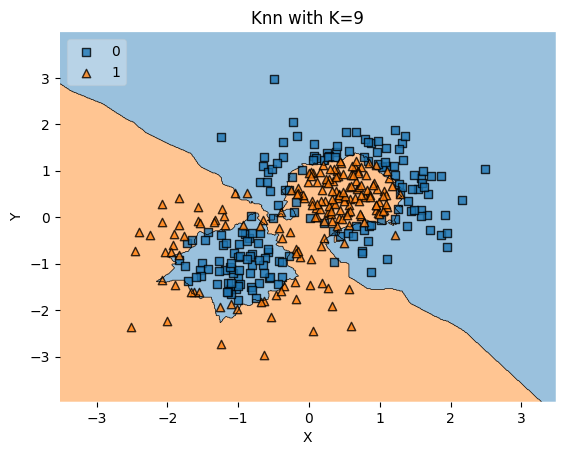

Train Accuracy :  0.9057142857142857
Val Accuracy :  0.86


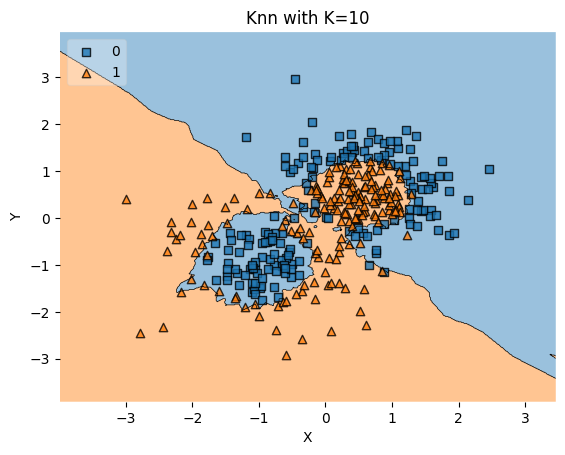

Train Accuracy :  0.8771428571428571
Val Accuracy :  0.8428571428571429


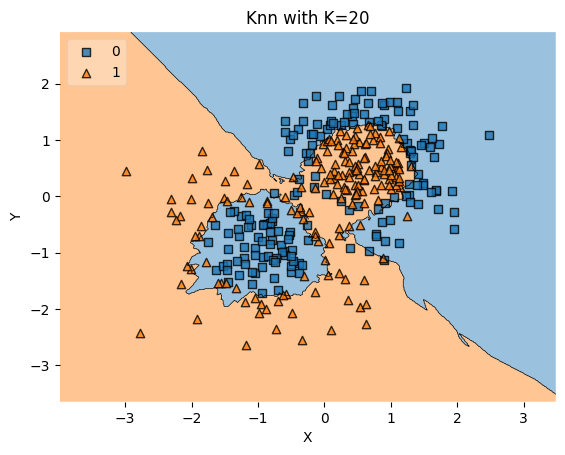

Train Accuracy :  0.84
Val Accuracy :  0.7742857142857142


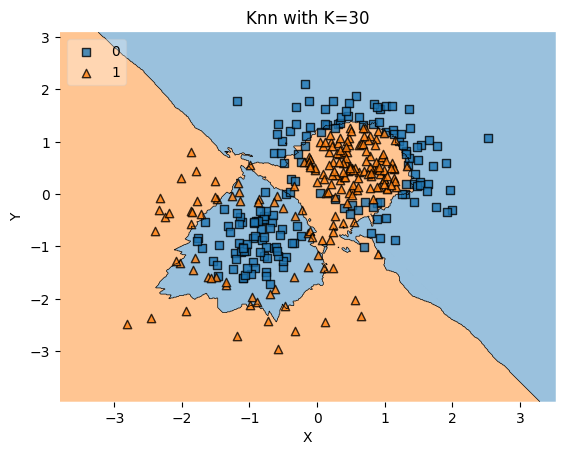

Train Accuracy :  0.7685714285714286
Val Accuracy :  0.7285714285714285


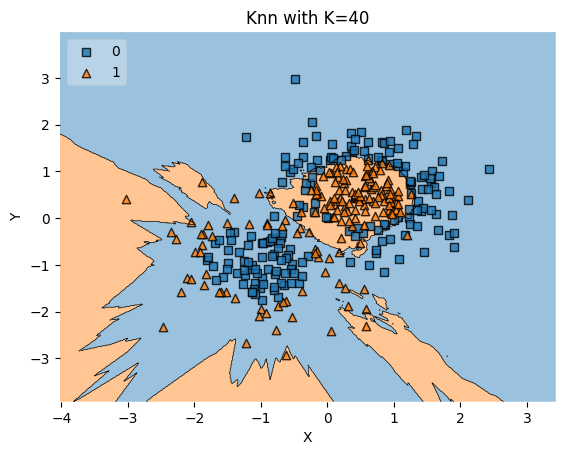

Train Accuracy :  0.6114285714285714
Val Accuracy :  0.557142857142857


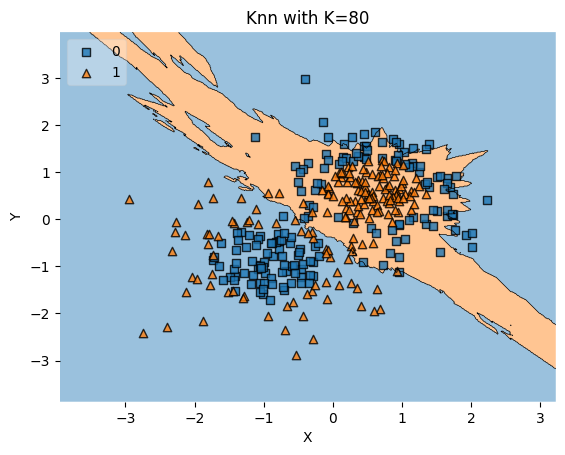

In [ ]:
data1 = pd.read_csv('concertriccir2.csv', header=None) # Read without header
# Assuming the first two columns are features and the last is the target
data1.columns = ['X', 'Y', 'class'] # Assign meaningful column names for clarity

for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,80]:
    knn_comparison(data1, i)

# XOR Dataset

Train Accuracy :  1.0
Val Accuracy : Not enough samples or a single class for cross-validation


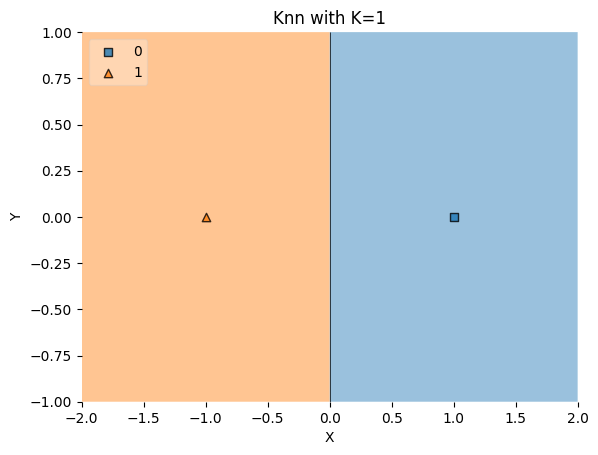

Train Accuracy :  1.0
Val Accuracy :  nan


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 144, in __call__
    score = scorer(estimator, *args, **routed_params.get(name).score)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 472, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py", line 446, in score
    return super().score(X, y, sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 572, in score
    return accuracy_score(y, self.predict(X), sample_

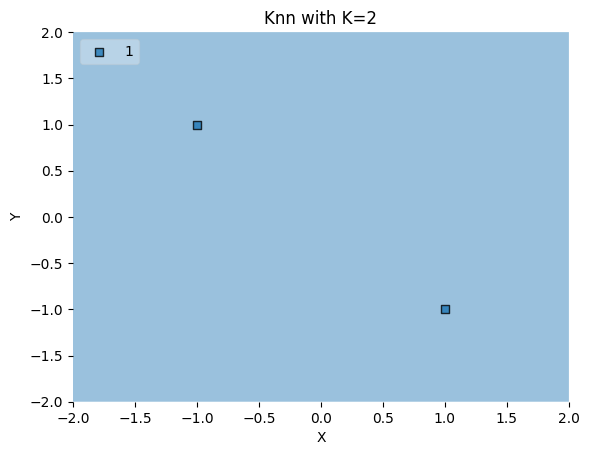

Train Accuracy :  1.0
Val Accuracy : Not enough samples or a single class for cross-validation


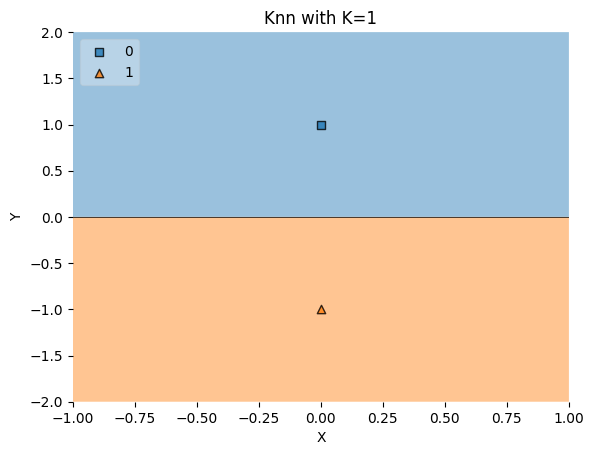

Train Accuracy :  1.0
Val Accuracy :  1.0


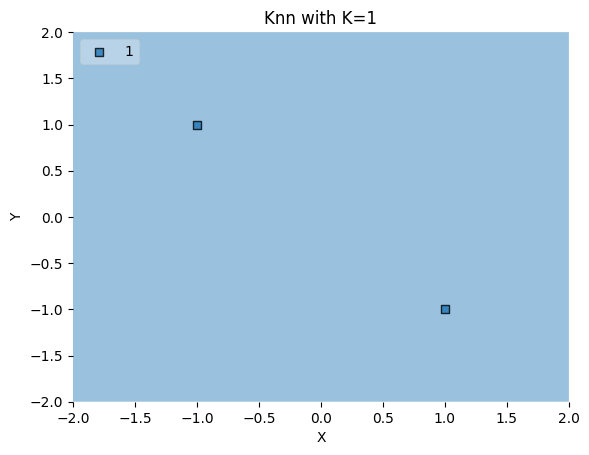

Train Accuracy :  1.0
Val Accuracy : Not enough samples or a single class for cross-validation


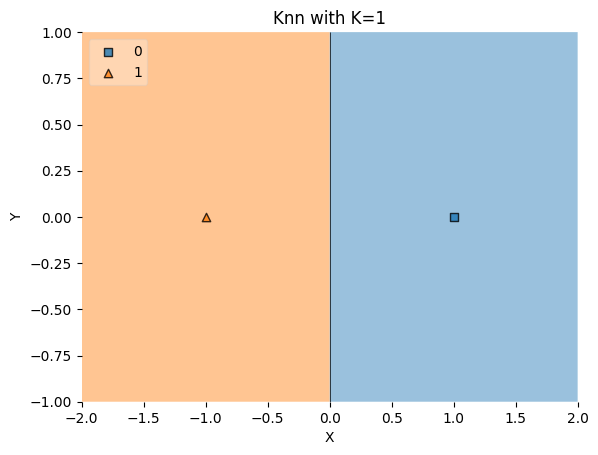

Train Accuracy :  1.0
Val Accuracy : Not enough samples or a single class for cross-validation


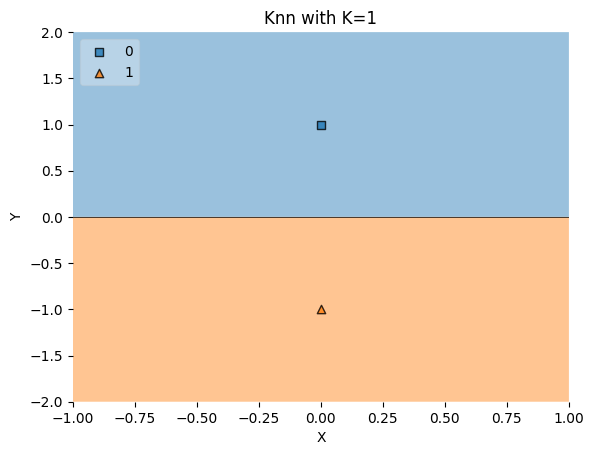

Train Accuracy :  1.0
Val Accuracy : Not enough samples or a single class for cross-validation


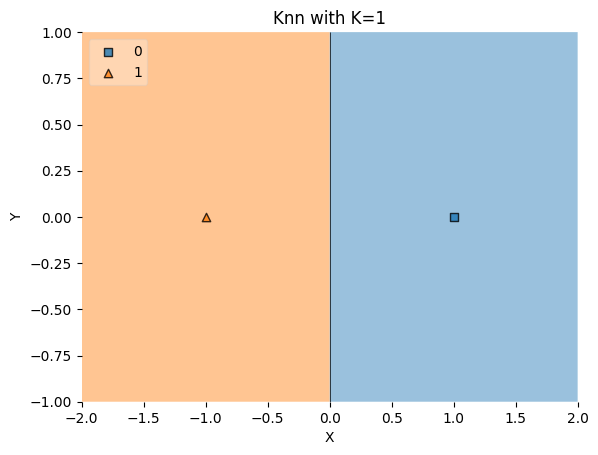

Train Accuracy :  1.0
Val Accuracy :  1.0


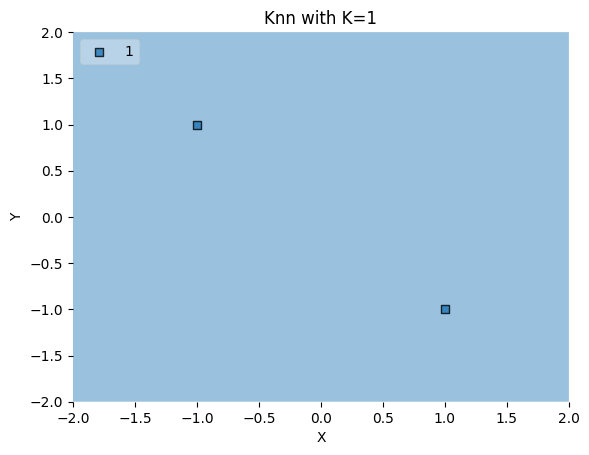

Train Accuracy :  1.0
Val Accuracy :  1.0


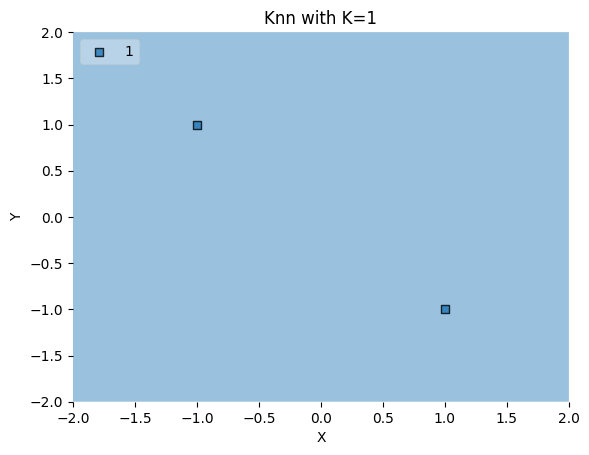

Train Accuracy :  1.0
Val Accuracy : Not enough samples or a single class for cross-validation


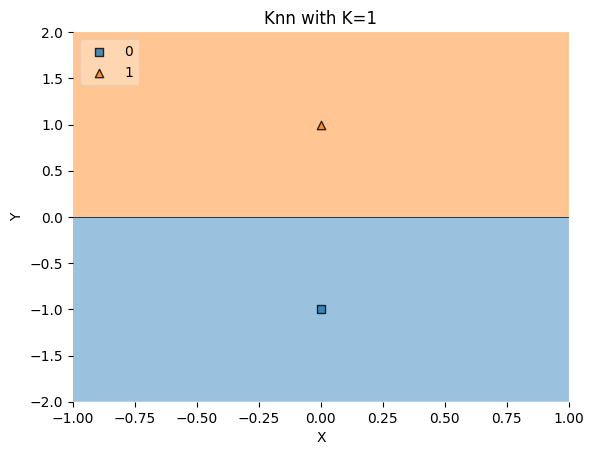

Train Accuracy :  1.0
Val Accuracy : Not enough samples or a single class for cross-validation


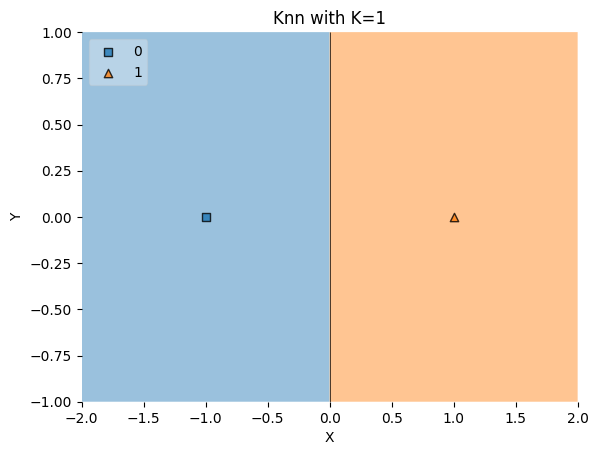

Train Accuracy :  1.0
Val Accuracy : Not enough samples or a single class for cross-validation


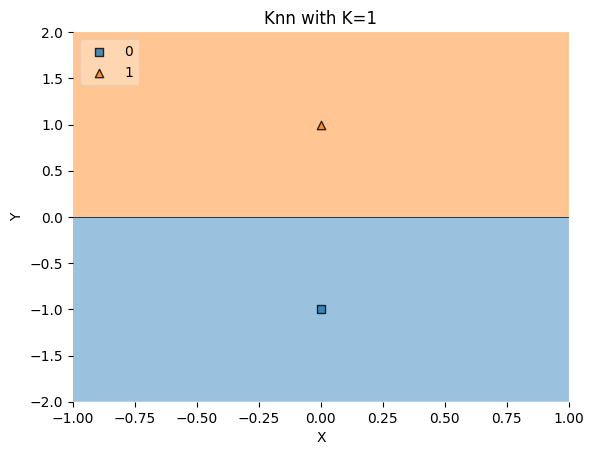

Train Accuracy :  1.0
Val Accuracy :  1.0


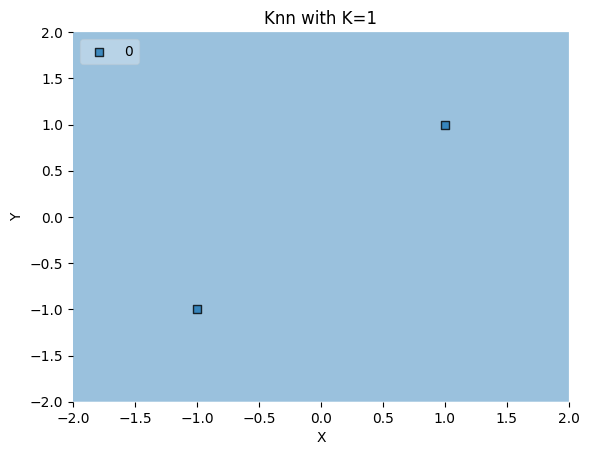

Train Accuracy :  1.0
Val Accuracy : Not enough samples or a single class for cross-validation


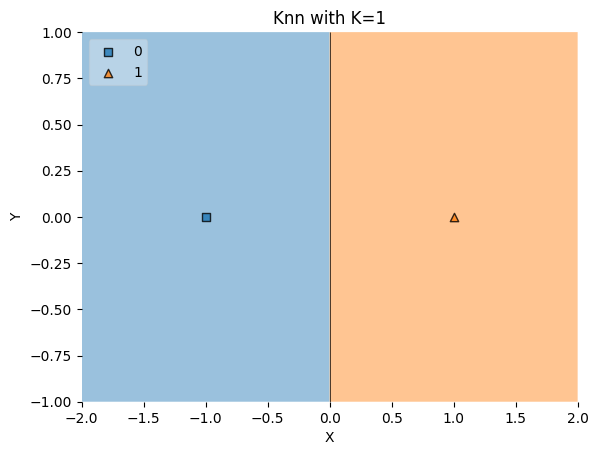

Train Accuracy :  1.0
Val Accuracy :  1.0


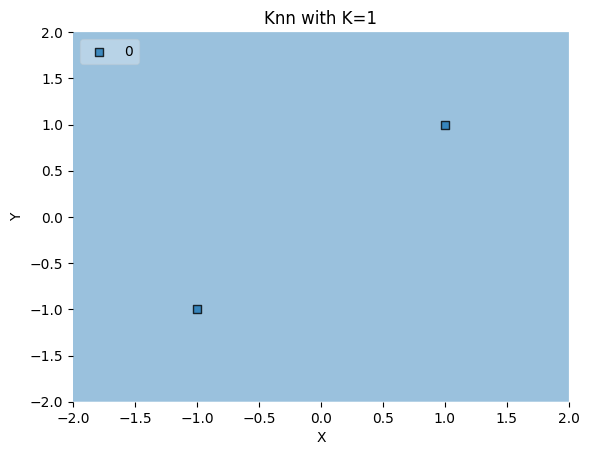

Train Accuracy :  1.0
Val Accuracy :  1.0


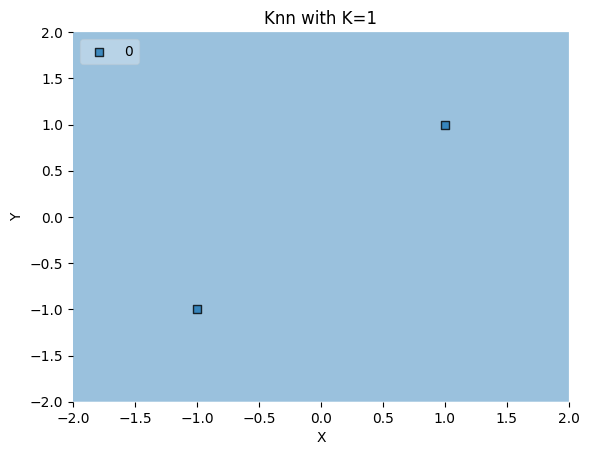

Train Accuracy :  1.0
Val Accuracy :  1.0


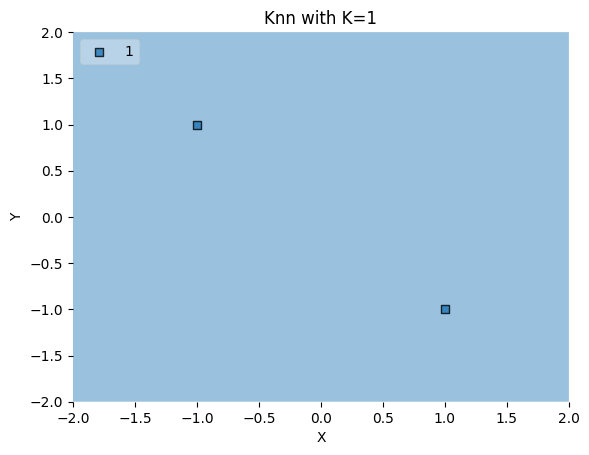

Train Accuracy :  1.0
Val Accuracy : Not enough samples or a single class for cross-validation


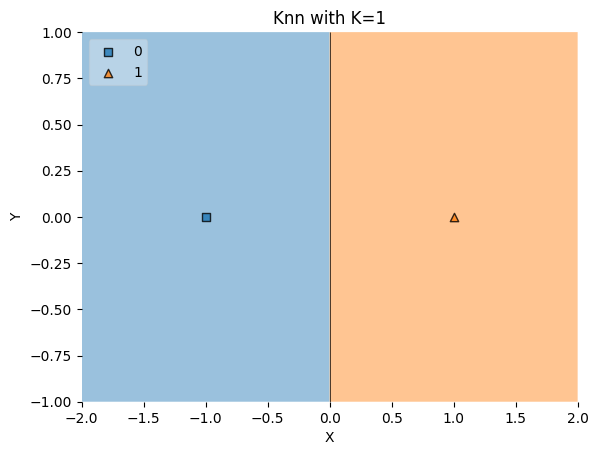

Train Accuracy :  1.0
Val Accuracy : Not enough samples or a single class for cross-validation


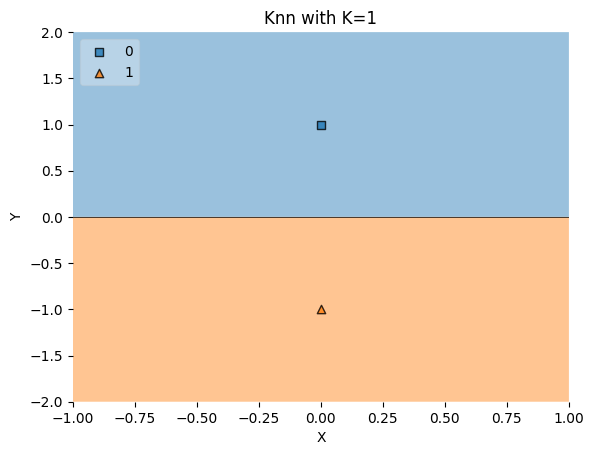

Train Accuracy :  1.0
Val Accuracy :  1.0


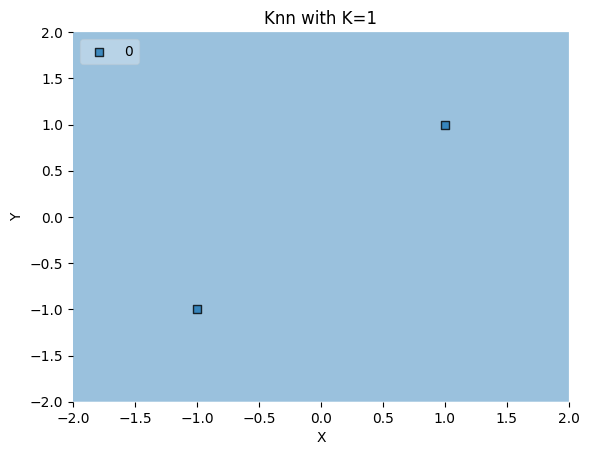

Train Accuracy :  1.0
Val Accuracy : Not enough samples or a single class for cross-validation


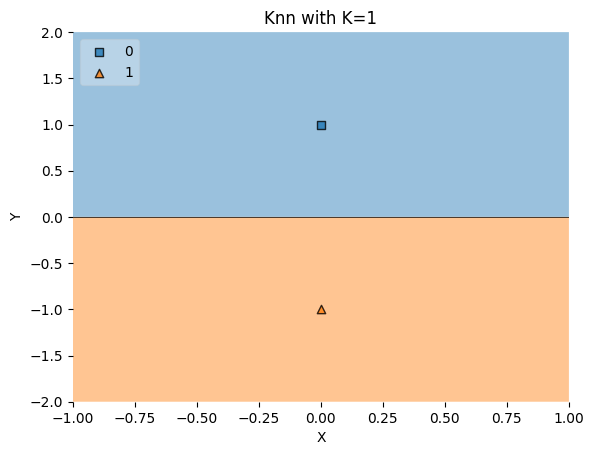

Train Accuracy :  1.0
Val Accuracy :  1.0


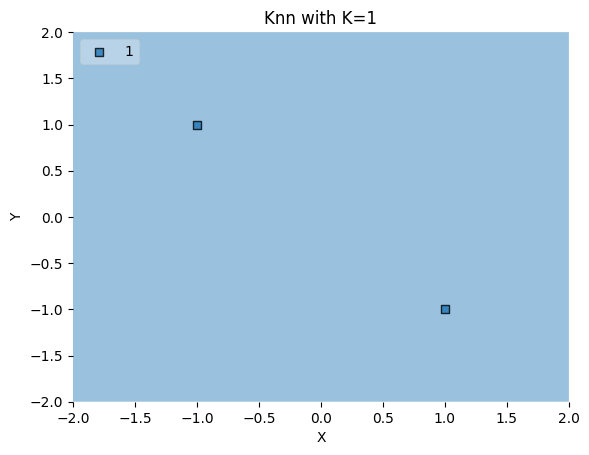

Train Accuracy :  1.0
Val Accuracy : Not enough samples or a single class for cross-validation


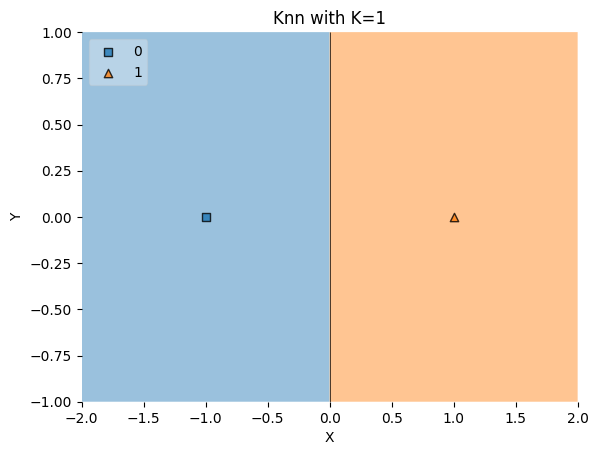

In [ ]:
data3 = pd.read_csv('xor.csv', header=None) # Read without header
data3.columns = ['X', 'Y', 'class'] # Assign meaningful column names for clarity

for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,27,28,19,20,30,40,60]:
   knn_comparison(data3,i)
   #knn_no_plot(data3, i)

# Linearly Separable

Train Accuracy :  1.0
Val Accuracy :  0.9


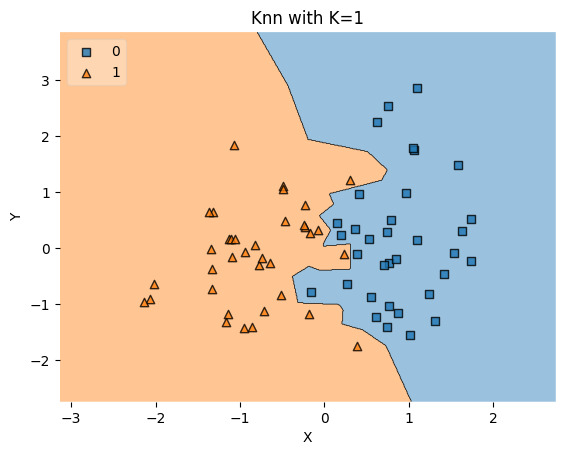

Train Accuracy :  0.9571428571428572
Val Accuracy :  0.9142857142857143


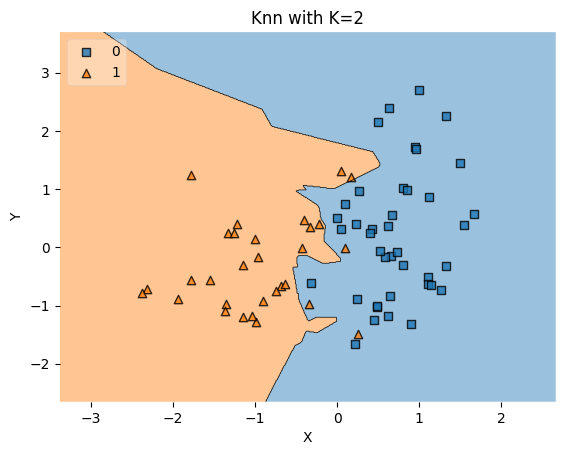

Train Accuracy :  0.9714285714285714
Val Accuracy :  0.9571428571428571


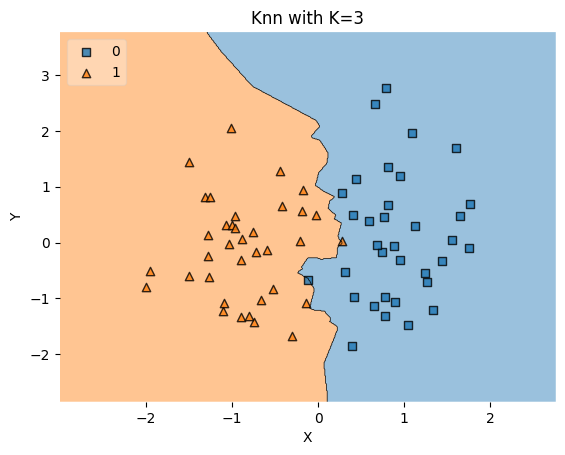

Train Accuracy :  0.9857142857142858
Val Accuracy :  0.9857142857142858


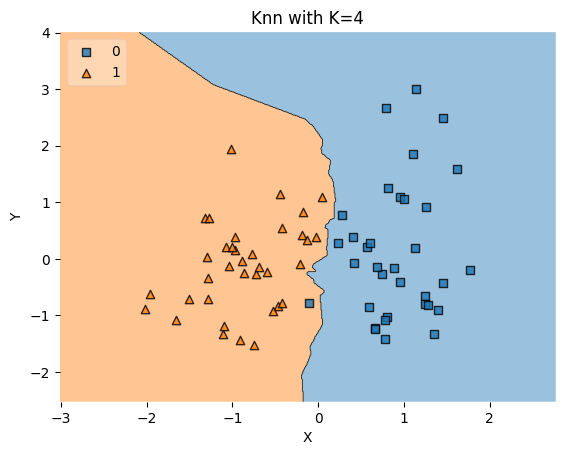

Train Accuracy :  0.9428571428571428
Val Accuracy :  0.9142857142857143


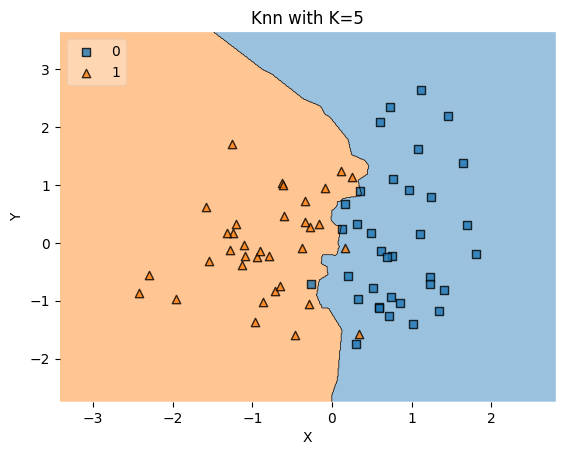

Train Accuracy :  0.9857142857142858
Val Accuracy :  0.9285714285714286


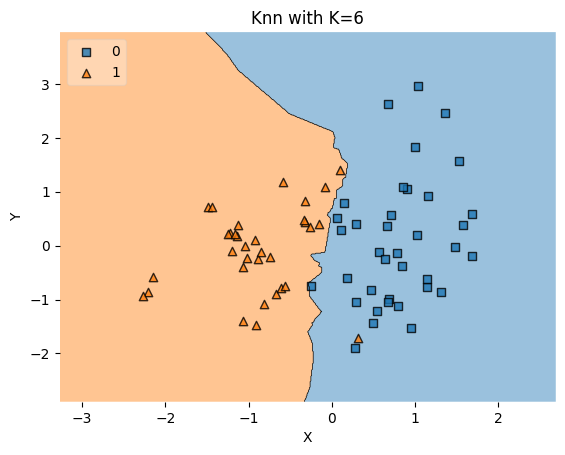

Train Accuracy :  0.9571428571428572
Val Accuracy :  0.9142857142857143


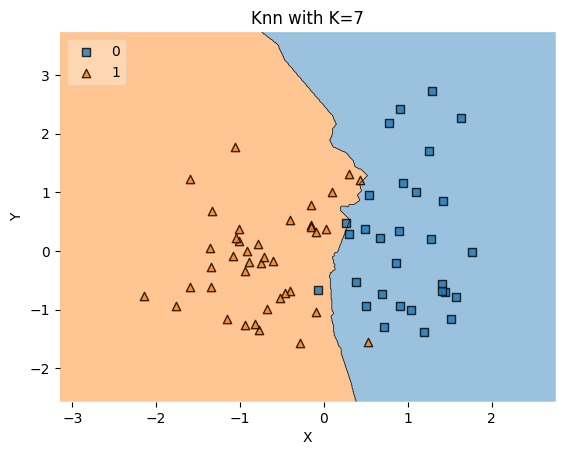

Train Accuracy :  0.9285714285714286
Val Accuracy :  0.9428571428571428


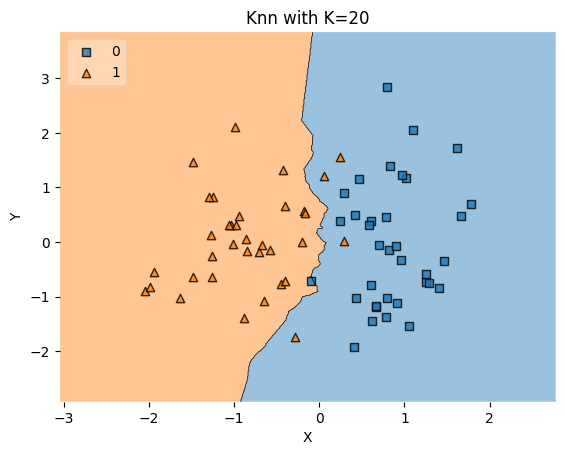

Train Accuracy :  0.9428571428571428
Val Accuracy :  0.9428571428571428


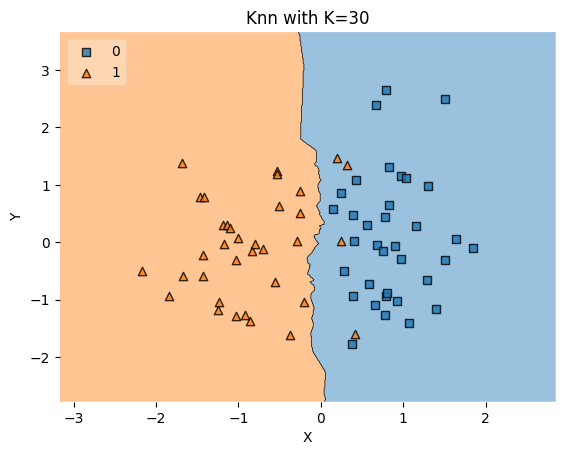

Train Accuracy :  0.9285714285714286
Val Accuracy :  0.9285714285714286


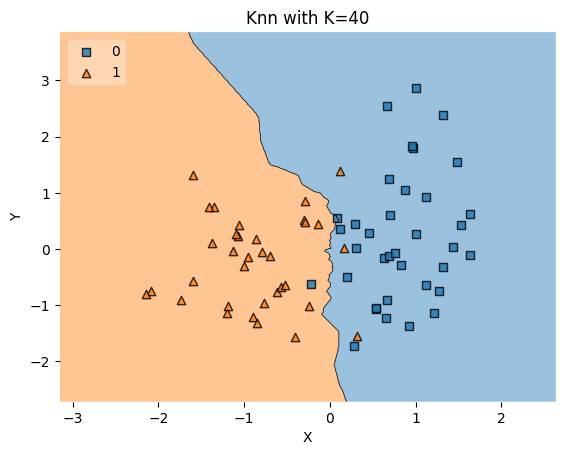

Train Accuracy :  0.9142857142857143
Val Accuracy :  0.6714285714285715


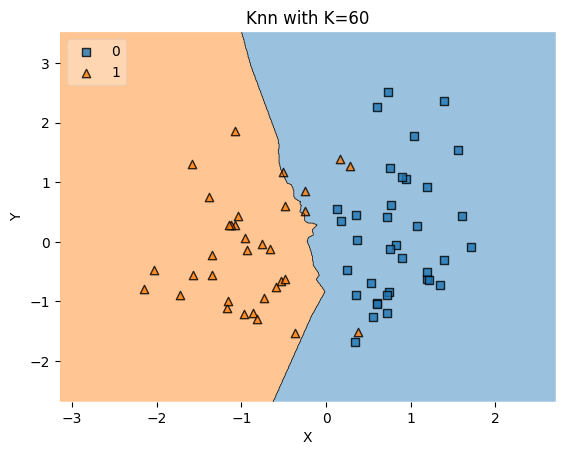

In [ ]:
data4 = pd.read_csv('4.linearsep.csv', header=None) # Read without header
data4.columns = ['X', 'Y', 'class'] # Assign meaningful column names for clarity

for i in [1,2,3,4,5,6,7,20,30,40,60]:
    knn_comparison(data4, i)

# Visualising the logistic regression decision boundary

0.95
Train Accuracy :  0.95
Val Accuracy :  0.95


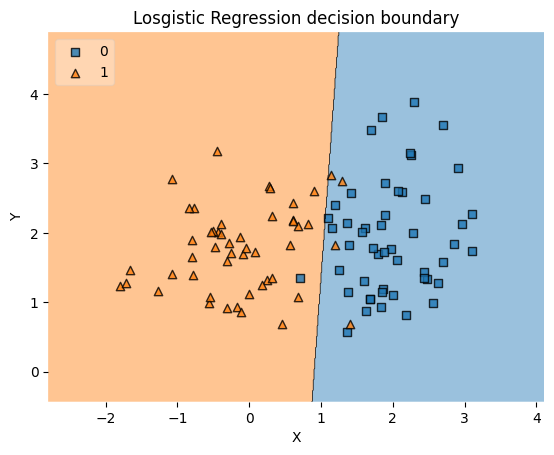

In [ ]:
logistic(data4,1)

0.5
Train Accuracy :  0.5
Val Accuracy :  0.0


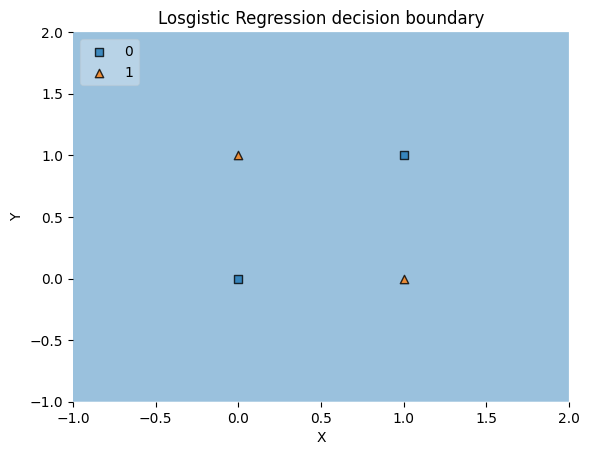

In [ ]:
logistic(data3,1)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np

data = pd.read_csv('ushape.csv', header=None)
data.columns = ['X', 'Y', 'class'] # Assign meaningful column names for clarity

x = data[['X','Y']].values
y = data['class'].astype(int).values

for k in [1,2,3,4,5,6,7,8,9,10,20,40,80]:
  clf = KNeighborsClassifier(n_neighbors=k)
  clf.fit(x,y)

  # Adjust cv based on the size of the data and minimum class size
  n_samples = len(x)
  unique_classes, class_counts = np.unique(y, return_counts=True)
  min_class_size = min(class_counts) if len(class_counts) > 0 else 0
  cv_value = min(10, n_samples, min_class_size) if min_class_size > 1 else 1 # Use at most 10 splits, and at least 1 if possible, limited by min class size

  print("K value : ", k, " train score : ", clf.score(x,y) , " test score : ", np.mean(cross_val_score(clf,x,y,cv = cv_value, scoring = 'accuracy')))

K value :  1  train score :  1.0  test score :  0.9199999999999999
K value :  2  train score :  0.95  test score :  0.9199999999999999
K value :  3  train score :  0.96  test score :  0.95
K value :  4  train score :  0.96  test score :  0.9400000000000001
K value :  5  train score :  0.96  test score :  0.95
K value :  6  train score :  0.96  test score :  0.93
K value :  7  train score :  0.96  test score :  0.9400000000000001
K value :  8  train score :  0.96  test score :  0.9199999999999999
K value :  9  train score :  0.95  test score :  0.93
K value :  10  train score :  0.92  test score :  0.9199999999999999
K value :  20  train score :  0.93  test score :  0.93
K value :  40  train score :  0.89  test score :  0.85
K value :  80  train score :  0.73  test score :  0.69


02-07-2025

# **Pre-processing**

In [ ]:
import pandas as pd
wbc = pd.read_csv('wbc.csv')
wbc.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [ ]:
wbc.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

In [ ]:
wbc.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: int64

In [ ]:
wbc.shape

(569, 33)

In [ ]:
del wbc['id']

In [ ]:
wbc.isnull().sum()

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: int64

In [ ]:
wbc.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst             float64
fractal_dimension_worst    float64
Unnamed: 32                float64
dtype: object

In [ ]:
wbc = wbc.drop_duplicates()

In [ ]:
wbc

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0           0.2419  ...          17.33           184.60      2019.0   
1           0.1812  ...          23.41           158.80      1956.0   
2           0.2069  ...          25.53           152.50      1709.0   
3           0.2597  ...          26.50            98.87       567.7   
4           0.1809  ...          16.67           152.20      1575.0   
..             ...  ...            ...              ...         ...   
564         0.1726  ...          26.40           166.10      2027.0   
565         0.1752  ...          38.25           155.00      1731.0   
566         0.1590  ...          34.12           126.70      1124.0   
567         0.2397  ...          39.42           184.60      1821.0   
568         0.1587  ...          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  \
0                  0.2654          0.4601                  0.11890   
1                  0.1860          0.2750                  0.08902   
2                  0.2430          0.3613                  0.08758   
3                  0.2575          0.6638                  0.17300   
4                  0.1625          0.2364                  0.07678   
..                    ...             ...                      ...   
564                0.2216          0.2060                  0.07115   
565                0.1628          0.2572               

In [ ]:
#del wbc['id']
wbc = wbc.drop('Unnamed: 32', axis=1) # Drop the 'Unnamed: 32' column
X = wbc.loc[:,wbc.columns[1:]]
y = wbc['diagnosis']
y = y.map({'M':1, 'B':0})

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 7)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)

# X_test = scaler.transform(X_test)

# Decision Tree Fitting

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth
dt = DecisionTreeClassifier()

# Fit dt to the training set
dt.fit(X_train, y_train) # it will ask all possible questions, compute the information gain and choose the best split

# Predict test set labels
y_pred = dt.predict(X_test)
y_pred
#print(y_pred[0:5])

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

# Evaluating a decision tree

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
#we compute the eval metric on test/validation set only primarily

# Predict test set labels
y_pred = dt.predict(X_test) # Model's predictions

# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
print("Test set f1-score: {:.2f}".format(f1))



# acc = roc_auc_score(y_train, dt.predict(X_train))
# print("Train set AUC : ", acc)


Test set accuracy: 0.92
Test set f1-score: 0.88


# Reducing Overfitting

In [ ]:
##there are 1 param to play with - max depth - to choose the best parameter, I will try different combinations and hoose the one which has the best accuracy/auc/any eval metric on cross-validation or test data-set
from sklearn.model_selection import cross_val_score #this will help me to do cross- validation
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(X_train, y_train) # the model is trained
  trainAccuracy = accuracy_score(y_train, dt.predict(X_train)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, X_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.9230769230769231  Cross val score :  0.883768115942029
Depth  :  2  Training Accuracy :  0.9626373626373627  Cross val score :  0.9231884057971014
Depth  :  3  Training Accuracy :  0.9714285714285714  Cross val score :  0.9232367149758455
Depth  :  4  Training Accuracy :  0.9868131868131869  Cross val score :  0.9276811594202898
Depth  :  5  Training Accuracy :  0.989010989010989  Cross val score :  0.9341545893719807
Depth  :  6  Training Accuracy :  0.9978021978021978  Cross val score :  0.918792270531401
Depth  :  7  Training Accuracy :  1.0  Cross val score :  0.9209178743961353
Depth  :  8  Training Accuracy :  1.0  Cross val score :  0.9121739130434783
Depth  :  9  Training Accuracy :  1.0  Cross val score :  0.9165700483091788
Depth  :  10  Training Accuracy :  1.0  Cross val score :  0.9165700483091788
Depth  :  20  Training Accuracy :  1.0  Cross val score :  0.927632850241546


# Visualising the decision boundary

In [ ]:
!pip install mlxtend==0.22.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 25.2 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.23.4
    Uninstalling mlxtend-0.23.4:
      Successfully uninstalled mlxtend-0.23.4


In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

def plot_labeled_decision_regions(X,y, models):
    '''Function producing a scatter plot of the instances contained
    in the 2D dataset (X,y) along with the decision
    regions of two trained classification models contained in the
    list 'models'.

    Parameters
    ----------
    X: pandas DataFrame corresponding to two numerical features
    y: pandas Series corresponding the class labels
    models: list containing two trained classifiers

    '''
    if len(models) != 2:
        raise Exception('''Models should be a list containing only two trained classifiers.''')
    if not isinstance(X, pd.DataFrame):
        raise Exception('''X has to be a pandas DataFrame with two numerical features.''')
    if not isinstance(y, pd.Series):
        raise Exception('''y has to be a pandas Series corresponding to the labels.''')
    fig, ax = plt.subplots(1, 2, figsize=(10.0, 5), sharey=True)
    for i, model in enumerate(models):
        plot_decision_regions(X.values, y.values, model, legend= 2, ax = ax[i])
        ax[i].set_title(model.__class__.__name__)
        ax[i].set_xlabel(X.columns[0])
        if i == 0:
            ax[i].set_ylabel(X.columns[1])
            ax[i].set_ylim(X.values[:,1].min(), X.values[:,1].max())
            ax[i].set_xlim(X.values[:,0].min(), X.values[:,0].max())
    plt.tight_layout()

In [ ]:
X_train

radius_mean  texture_mean
40        13.440         21.58
375       16.170         16.07
159       10.900         12.96
278       13.590         17.84
303       10.490         18.61
..           ...           ...
211       11.840         18.94
502       12.540         16.32
537       11.690         24.44
196       13.770         22.29
175        8.671         14.45

[455 rows x 2 columns]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

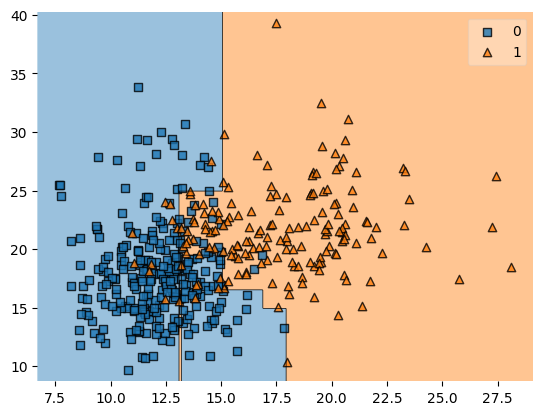

In [ ]:
from sklearn.linear_model import LogisticRegression

dt = DecisionTreeClassifier(max_depth=4)
X_train = X_train.loc[:,['radius_mean', 'texture_mean']]
X_test = X_test.loc[:,['radius_mean', 'texture_mean']]
dt.fit(X_train, y_train)

# Instantiate logreg
logreg = LogisticRegression(random_state=1)
logreg.fit(X_train, y_train)

clfs = [logreg, dt]

# Review the decision regions of the two classifier
plot_decision_regions(X_train.values, y_train.values, dt)

In [ ]:
X_train.columns

Index(['radius_mean', 'texture_mean'], dtype='object')

# Feature Importances

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 7)

from matplotlib import pyplot
dt = DecisionTreeClassifier(max_depth = 5)
# Fit dt to the training set
dt.fit(X_train, y_train)
importance = dt.feature_importances_
#pyplot.bar([x for x in range(len(importance))], importance)
list(zip(importance,X_test.columns)) # it calculates the feature importances based on IG

[(np.float64(0.0), 'radius_mean'),
 (np.float64(0.06371308721105767), 'texture_mean'),
 (np.float64(0.0), 'perimeter_mean'),
 (np.float64(0.0), 'area_mean'),
 (np.float64(0.0), 'smoothness_mean'),
 (np.float64(0.0), 'compactness_mean'),
 (np.float64(0.0), 'concavity_mean'),
 (np.float64(0.0), 'concave points_mean'),
 (np.float64(0.0), 'symmetry_mean'),
 (np.float64(0.0), 'fractal_dimension_mean'),
 (np.float64(0.0), 'radius_se'),
 (np.float64(0.009036542988576906), 'texture_se'),
 (np.float64(0.0), 'perimeter_se'),
 (np.float64(0.0034302219715076207), 'area_se'),
 (np.float64(0.0014979777520588164), 'smoothness_se'),
 (np.float64(0.0), 'compactness_se'),
 (np.float64(0.0), 'concavity_se'),
 (np.float64(0.013831443349862619), 'concave points_se'),
 (np.float64(0.0), 'symmetry_se'),
 (np.float64(0.0), 'fractal_dimension_se'),
 (np.float64(0.0), 'radius_worst'),
 (np.float64(0.0), 'texture_worst'),
 (np.float64(0.0), 'perimeter_worst'),
 (np.float64(0.7417969170455776), 'area_worst'),
 (n

In [ ]:
list(zip([1,2,3],[4,5,6]))

[(1, 4), (2, 5), (3, 6)]

In [ ]:
X.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

# Visualising the tree

[Text(0.6490384615384616, 0.9166666666666666, 'x[23] <= 884.55\ngini = 0.47\nsamples = 455\nvalue = [283, 172]'),
 Text(0.4519230769230769, 0.75, 'x[27] <= 0.16\ngini = 0.167\nsamples = 304\nvalue = [276, 28]'),
 Text(0.5504807692307693, 0.8333333333333333, 'True  '),
 Text(0.28846153846153844, 0.5833333333333334, 'x[27] <= 0.132\ngini = 0.074\nsamples = 285\nvalue = [274, 11]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[13] <= 38.605\ngini = 0.03\nsamples = 259\nvalue = [255, 4]'),
 Text(0.07692307692307693, 0.25, 'x[14] <= 0.003\ngini = 0.016\nsamples = 249\nvalue = [247.0, 2.0]'),
 Text(0.038461538461538464, 0.08333333333333333, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.11538461538461539, 0.08333333333333333, 'gini = 0.008\nsamples = 243\nvalue = [242, 1]'),
 Text(0.23076923076923078, 0.25, 'x[11] <= 2.007\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.19230769230769232, 0.08333333333333333, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.2692307692307

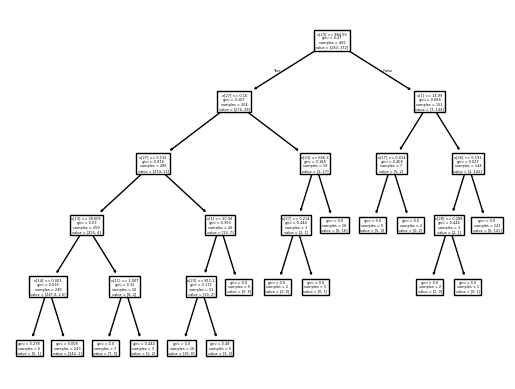

In [ ]:
from sklearn import tree
tree.plot_tree(dt) # dt is the decison tree that I have learnt

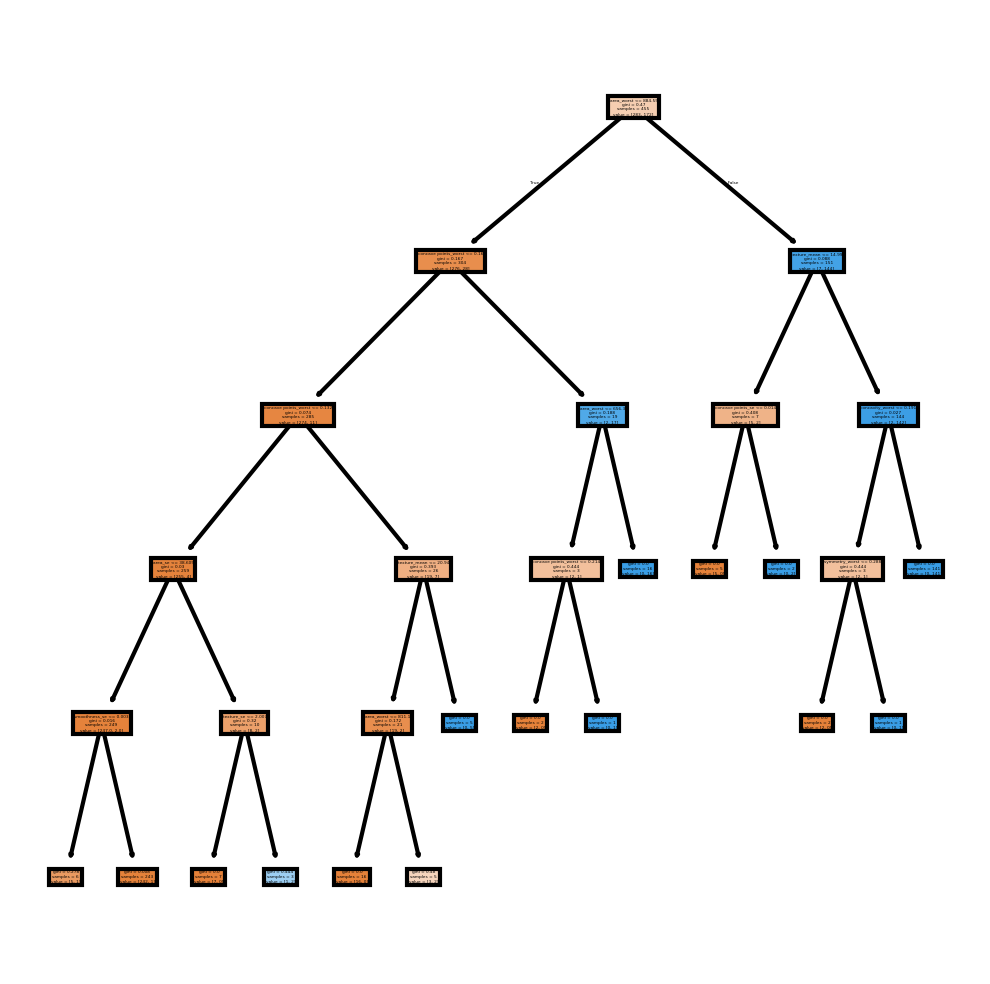

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt,
               feature_names = X_test.columns,
               filled = True);
fig.savefig('imagename.png')

In [ ]:
dt.predict_proba(X_test)

array([[0.99588477, 0.00411523],
       [0.        , 1.        ],
       [0.99588477, 0.00411523],
       [0.99588477, 0.00411523],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.99588477, 0.00411523],
       [0.99588477, 0.00411523],
       [1.        , 0.        ],
       [0.99588477, 0.00411523],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.6       , 0.4       ],
       [0.99588477, 0.00411523],
       [0.99588477, 0.00411523],
       [0.99588477, 0.00411523],
       [0.99588477, 0.00411523],
       [0.99588477, 0.00411523],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.99588477, 0.00411523],
       [0.        , 1.        ],
       [0.99588477, 0.00411523],
       [0.        , 1.        ],
       [0.99588477, 0.00411523],
       [0.99588477, 0.00411523],
       [0.        , 1.        ],
       [0.

In [ ]:
X_test.iloc[0,:].values

array([1.166e+01, 1.707e+01, 7.370e+01, 4.210e+02, 7.561e-02, 3.630e-02,
       8.306e-03, 1.162e-02, 1.671e-01, 5.731e-02, 3.534e-01, 6.724e-01,
       2.225e+00, 2.603e+01, 6.583e-03, 6.991e-03, 5.949e-03, 6.296e-03,
       2.216e-02, 2.668e-03, 1.328e+01, 1.974e+01, 8.361e+01, 5.425e+02,
       9.958e-02, 6.476e-02, 3.046e-02, 4.262e-02, 2.731e-01, 6.825e-02,
             nan])

In [ ]:
dt.fit(X_train, y_train) # Fit the model to the training data
dt.predict([[1.193e+01, 1.091e+01, 7.614e+01, 4.427e+02, 8.872e-02, 5.242e-02,
       2.606e-02, 1.796e-02, 1.601e-01, 5.541e-02, 2.522e-01, 1.045e+00,
       1.649e+00, 1.895e+01, 6.175e-03, 1.204e-02, 1.376e-02, 5.832e-03,
       1.096e-02, 1.857e-03, 1.380e+01, 2.014e+01, 8.764e+01, 5.895e+02,
       1.374e-01, 1.575e-01, 1.514e-01, 6.876e-02, 2.460e-01, 7.262e-02]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([0.01544402])

# **Regression Trees**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

mpg = pd.read_csv('auto-mpg.csv')
mpg.head()
mpg.shape
#del mpg['car name']
mpg.dtypes
mpg.horsepower.unique()
# # # # # # # # (mpg.horsepower.value_counts())['?']
# mpg = mpg.loc[mpg.horsepower != '?', :]
# mpg.horsepower.unique()
# mpg.horsepower = mpg.horsepower.astype('int')
# # # # mpg.head()
# mpg.isna().sum()
# mpg = mpg.drop_duplicates()
# mpg.describe()
# # mpg
# # # # # # # # # # # # #mpg.origin.unique()

# # # # # # # # # # # # # #split
# X = mpg.drop('mpg', axis='columns')
# y = mpg['mpg']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [ ]:
X_train

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
40        13.440         21.58           86.18      563.0          0.08162   
375       16.170         16.07          106.30      788.5          0.09880   
159       10.900         12.96           68.69      366.8          0.07515   
278       13.590         17.84           86.24      572.3          0.07948   
303       10.490         18.61           66.86      334.3          0.10680   
..           ...           ...             ...        ...              ...   
211       11.840         18.94           75.51      428.0          0.08871   
502       12.540         16.32           81.25      476.3          0.11580   
537       11.690         24.44           76.37      406.4          0.12360   
196       13.770         22.29           90.63      588.9          0.12000   
175        8.671         14.45           54.42      227.2          0.09138   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
40            0.06031         0.03110             0.020310         0.1784   
375           0.14380         0.06651             0.053970         0.1990   
159           0.03718         0.00309             0.006588         0.1442   
278           0.04052         0.01997             0.012380         0.1573   
303           0.06678         0.02297             0.017800         0.1482   
..                ...             ...                  ...            ...   
211           0.06900         0.02669             0.013930         0.1533   
502           0.10850         0.05928             0.032790         0.1943   
537           0.15520         0.04515             0.045310         0.2131   
196           0.12670         0.13850             0.065260         0.1834   
175           0.04276         0.00000             0.000000         0.1722   

     fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
40                  0.05587  ...          30.25           102.50       787.9   
375                 0.06572  ...          19.14           113.10       861.5   
159                 0.05743  ...          18.20            78.07       470.0   
278                 0.05520  ...          26.10            98.91       739.1   
303                 0.06600  ...          24.54            70.76       375.4   
..                      ...  ...            ...              ...         ...   
211                 0.06057  ...          24.99            85.22       546.3   
502                 0.06612  ...          21.40            86.67       552.0   
537                 0.07405  ...          32.19            86.12       487.7   
196                 0.06877  ...          34.01           111.60       806.9   
175                 0.06724  ...          17.04            58.36       259.2   

     smoothness_worst  compactness_worst  concavity_worst  \
40             0.1094            0.20430          0.20850   
375            0.1235            0.25500          0.21140   
159            0.1171            0.08294          0.01854   
278            0.1050            0.07622          0.10600   
303            0.1413            0.10440          0.08423   
..                ...                ...              ...   
211            0.1280            0.18800          0.14710   
502            0.1580            0.17510          0.18890   
537            0.1768            0.32510          0.13950   
196            0.1737            0.31220          0.38090   
175            0.1162            0.07057          0.00000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  \
40                0.11120          0.2994                  0.07146   
375               0.12510          0.3153                  0.08960   
159               0.03953          0.2738                  0.07685   
278               0.05185          0.2335                  0.06263   
303               0.06528          0.2213                  0.07842   
..                    ...    

# Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor()

# Fit dt to the training set
dt.fit(X_train, y_train)
dt.predict(X_test)

array([0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# Evaluation Metrics

In [ ]:
from sklearn.metrics import  r2_score

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
rsquared = r2_score(y_test,y_pred)
# Compute rmse_dt


# Print rmse_dt
print("Test set R2 of dt: {:.2f}".format(rsquared))

Test set R2 of dt: 0.65


# Linear Regression vs Decision Tree Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_lr = lr.predict(X_test)

# Compute mse_lr
rsquared = r2_score(y_test,y_pred_lr)
# Compute rmse_lr

# Print rmse_lr
print("Linear Regression test set R2: {:.2f}".format(rsquared))

# Print rmse_dt
print("Linear Regression Score : ",  r2_score(y_test,y_pred_lr))
print("Regression Tree's Score : ",  r2_score(y_test,y_pred))

Linear Regression test set R2: 0.71
Linear Regression Score :  0.7085670939696387
Regression Tree's Score :  0.6533783783783784


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60]:
  dt = DecisionTreeRegressor(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(X_train, y_train) # the model is trained
  trainAccuracy = r2_score(y_train, dt.predict(X_train)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeRegressor(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, X_train, y_train, cv=10, scoring = make_scorer(r2_score)) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth : ",depth, " Train R2 : ",trainAccuracy, " Val Score : ", np.mean(valAccuracy))

Depth :  1  Train R2 :  0.6999767864913735  Val Score :  0.6086000955347382
Depth :  2  Train R2 :  0.8526297107644341  Val Score :  0.7217554385467932
Depth :  3  Train R2 :  0.902907828117377  Val Score :  0.7039760340906643
Depth :  4  Train R2 :  0.9495845160574915  Val Score :  0.6939662159993254
Depth :  5  Train R2 :  0.9654526343163682  Val Score :  0.6711398058140569
Depth :  6  Train R2 :  0.991202331865444  Val Score :  0.6412508040230989
Depth :  7  Train R2 :  1.0  Val Score :  0.6565246910454775
Depth :  8  Train R2 :  1.0  Val Score :  0.6378368389061249
Depth :  9  Train R2 :  1.0  Val Score :  0.6166295276988136
Depth :  10  Train R2 :  1.0  Val Score :  0.6424676531477136
Depth :  20  Train R2 :  1.0  Val Score :  0.657929956038035
Depth :  40  Train R2 :  1.0  Val Score :  0.6730150424915424
Depth :  60  Train R2 :  1.0  Val Score :  0.6517745928826718


In [ ]:
from matplotlib import pyplot
dt = DecisionTreeRegressor(max_depth = 5)
# Fit dt to the training set
dt.fit(X_train, y_train)
importance = dt.feature_importances_
#pyplot.bar([x for x in range(len(importance))], importance)
list(zip(importance,X_test.columns))

[(np.float64(0.0), 'radius_mean'),
 (np.float64(0.06371308721105781), 'texture_mean'),
 (np.float64(0.0), 'perimeter_mean'),
 (np.float64(0.0), 'area_mean'),
 (np.float64(0.0064546735632692205), 'smoothness_mean'),
 (np.float64(0.020286116913131837), 'compactness_mean'),
 (np.float64(0.0), 'concavity_mean'),
 (np.float64(0.0), 'concave points_mean'),
 (np.float64(0.0), 'symmetry_mean'),
 (np.float64(0.0), 'fractal_dimension_mean'),
 (np.float64(0.0), 'radius_se'),
 (np.float64(0.00903654298857691), 'texture_se'),
 (np.float64(0.0), 'perimeter_se'),
 (np.float64(0.003430221971507665), 'area_se'),
 (np.float64(0.0014979777520587204), 'smoothness_se'),
 (np.float64(0.0), 'compactness_se'),
 (np.float64(0.0), 'concavity_se'),
 (np.float64(0.0), 'concave points_se'),
 (np.float64(0.0), 'symmetry_se'),
 (np.float64(0.0), 'fractal_dimension_se'),
 (np.float64(0.0), 'radius_worst'),
 (np.float64(0.0), 'texture_worst'),
 (np.float64(0.0), 'perimeter_worst'),
 (np.float64(0.7417969170455777), 'a

In [ ]:
X_train.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
from matplotlib import pyplot
dt = DecisionTreeRegressor(max_depth = 3)
# X_train = X_train.loc[:,['horsepower','displacement','model year']]
# X_test = X_test.loc[:,['horsepower','displacement','model year']]
# Fit dt to the training set
dt.fit(X_train_selected, y_train)
r2_score(dt.predict(X_test_selected),y_test)

0.7042743957161158

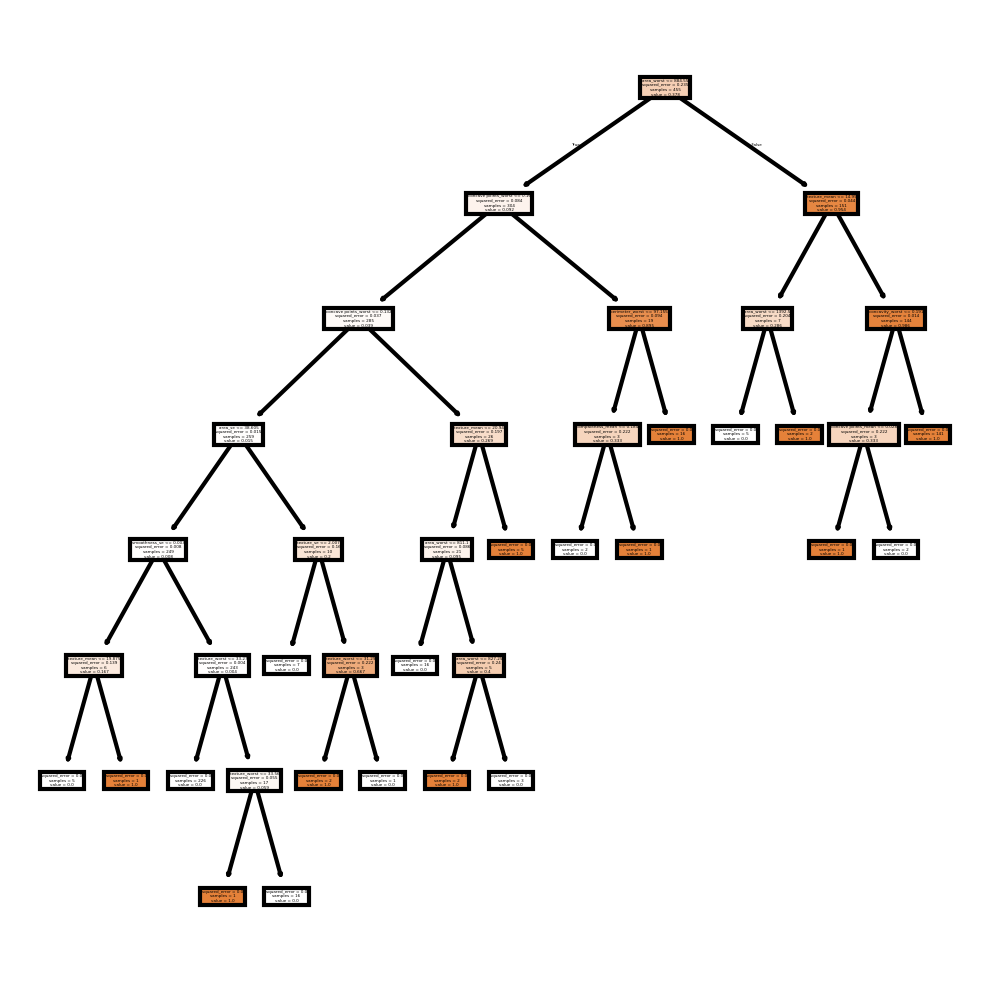

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt,
               feature_names = X_test.columns,
               filled = True);
fig.savefig('imagename.png')

In [ ]:
from sklearn.linear_model import Lasso

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


lr = Lasso(alpha = 0)

lr.fit(X_train_scaled, y_train)
lr.score(X_test_scaled, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.718e+03, tolerance: 1.975e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

0.7901500386760347

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import numpy as np

# Load the dataset
mpg = pd.read_csv('auto-mpg.csv')

# Handle missing values in 'horsepower'
# Replace '?' with NaN and then drop rows with NaN in 'horsepower'
mpg = mpg.replace('?', np.nan)
mpg = mpg.dropna(subset=['horsepower'])

# Convert 'horsepower' to numeric
mpg['horsepower'] = mpg['horsepower'].astype(float)

# Drop the 'car name' column as it's not a feature
mpg = mpg.drop('car name', axis=1)

# Define features (X) and target (y)
X = mpg.drop('mpg', axis='columns')
y = mpg['mpg']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# Select the specific columns for the regression tree as in the user's previous code attempt
X_train_selected = X_train.loc[:,['horsepower','displacement','model year']]
X_test_selected = X_test.loc[:,['horsepower','displacement','model year']]

# Instantiate and fit the Decision Tree Regressor
dt = DecisionTreeRegressor(max_depth = 3)
dt.fit(X_train_selected, y_train)

# Evaluate the model
r2 = r2_score(dt.predict(X_test_selected),y_test)
print(f"R2 score with selected features: {r2:.2f}")

R2 score with selected features: 0.70


**03-07-2025**

**Project Title: Diabetes Prediction System**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

In [ ]:
# Load data
df = pd.read_csv("diabetes.csv")

In [ ]:
# Features and labels
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save model
joblib.dump(model, "diabetes_model.pkl")

['diabetes_model.pkl']

In [ ]:
# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [ ]:
model = joblib.load("diabetes_model.pkl")

In [ ]:
streamlit run app.py

In [ ]:
import streamlit as st
import pandas as pd
import joblib

model = joblib.load("diabetes_model.pkl")

st.set_page_config(page_title="Diabetes Prediction", layout="centered")
st.title("🩺 Diabetes Risk Prediction App")

glucose = st.slider("Glucose Level", 50, 200, 100)
bp = st.slider("Blood Pressure", 40, 120, 70)
bmi = st.slider("BMI", 15.0, 50.0, 25.0)
age = st.slider("Age", 18, 100, 30)
preg = st.number_input("Pregnancies", min_value=0, max_value=20, value=1)
skin = st.slider("Skin Thickness", 0, 100, 20)
insulin = st.slider("Insulin", 0, 600, 80)
dpf = st.number_input("Diabetes Pedigree Function", min_value=0.0, max_value=2.5, value=0.5)

if st.button("Predict"):
    input_data = pd.DataFrame([[preg, glucose, bp, skin, insulin, bmi, dpf, age]],
                               columns=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
                                        "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"])
    prediction = model.predict(input_data)[0]
    st.success("Prediction: 🟢 No Diabetes" if prediction == 0 else "Prediction: 🔴 At Risk of Diabetes")

<h2 id="t1" style="margin-bottom: 18px">Imbalanced datasets</h2>

In [ ]:
import numpy as np
import pandas as pd

df_train = pd.read_csv('train.csv')
df_train

target_count = df_train.target.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion of class 0 is ', round(target_count[0] * 100 / (target_count[1] + target_count[0]), 2),'%')

# target_count.plot(kind='bar', title='Count (target)');

Class 0: 10447
Class 1: 412
Proportion of class 0 is  96.21 %


In [ ]:
df_train

id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0          7       0          2              2          5              1   
1          9       0          1              1          7              0   
2         13       0          5              4          9              1   
3         16       0          0              1          2              0   
4         17       0          0              2          0              1   
...      ...     ...        ...            ...        ...            ...   
10854  27413       0          0              1          3              1   
10855  27419       0          1              1          6              0   
10856  27421       0          0              2          1              0   
10857  27427       0          1              1          2              1   
10858  27429       0          0              1          4              1   

       ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
0                  0              0              1              0  ...   
1                  0              0              0              1  ...   
2                  0              0              0              1  ...   
3                  0              1              0              0  ...   
4                  0              1              0              0  ...   
...              ...            ...            ...            ...  ...   
10854              0              0              1              0  ...   
10855              0              1              0              0  ...   
10856              0              1              0              0  ...   
10857              0              0              0              0  ...   
10858              0              1              0              0  ...   

       ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
0             9.0         1.0         5.0         8.0             0.0   
1             3.0         1.0         1.0         9.0             0.0   
2             4.0         2.0         7.0         7.0             0.0   
3             2.0         2.0         4.0         9.0             0.0   
4             3.0         1.0         1.0         3.0             0.0   
...           ...         ...         ...         ...             ...   
10854         4.0         3.0         2.0         7.0             1.0   
10855         9.0         2.0         2.0        10.0             0.0   
10856         0.0         1.0         2.0         4.0             0.0   
10857         3.0         1.0         1.0         8.0             1.0   
10858         NaN         NaN         NaN         NaN             NaN   

       ps_calc_16_bin  ps_calc_17_bin  ps_calc_18_bin  ps_calc_19_bin  \
0                 1.0             1.0             0.0             0.0   
1                 1.0             1.0             0.0             1.0   
2                 1.0             1.0             0.0             1.0   
3                 0.0             0.0             0.0             0.0   
4                 0.0             0.0             1.0             1.0   
...               ...             ...             ...             ...   
10854             1.0             1.0             1.0             0.0   
10855             1.0             0.0             1.0             1.0   
10856             0.0             0.0             1.0             0.0   
10857             1.0             0.0             0.0             0.0   
10858             NaN             NaN             NaN             NaN   

       ps_calc_20_bin  
0                 1.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  
...               ...  
10854             0.0  
10855             0.0  
10856             1.0  
10857             0.0  
10858             NaN  

[10859 rows x 59 columns]

<h2 id="t2" style="margin-bottom: 18px">The metric trap</h2>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Remove 'id' and 'target' columns
labels = df_train.columns[2:]
df_train = df_train.dropna()

X = df_train[labels]
y = df_train['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.08%


Now let's run the same code, but using only one feature (which should drastically reduce the accuracy of the classifier):

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train[['ps_ind_04_cat']], y_train)
y_pred = model.predict(X_test[['ps_ind_04_cat']])

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.13%


<h2 id="t3" style="margin-bottom: 18px">Confusion matrix</h2>

Confusion matrix:
 [[2088    0]
 [  84    0]]


/tmp/ipython-input-5-3895926172.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + labels)
/tmp/ipython-input-5-3895926172.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + labels)


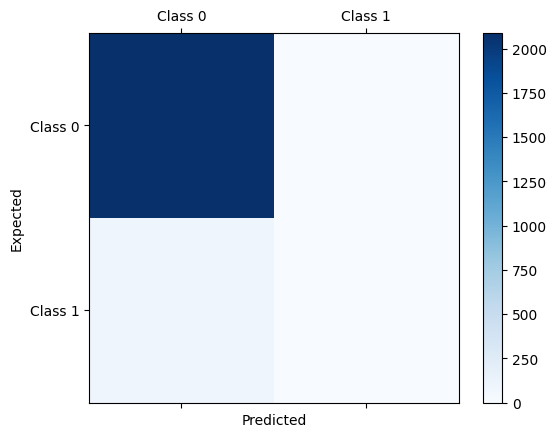

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, model.predict(X_test[['ps_ind_04_cat']]))

0.0

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,model.predict(X_test[['ps_ind_04_cat']]))

np.float64(0.5)

<h2 id="t4" style="margin-bottom: 18px">Resampling</h2>

![](https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/resampling.png)

In [ ]:
# Class count
count_class_0, count_class_1 = df_train.target.value_counts()

# Divide by class
df_class_0 = df_train[df_train['target'] == 0]
df_class_1 = df_train[df_train['target'] == 1]

count_class_0, count_class_1

(10446, 412)

<h2 id="t5">Random under-sampling</h2>

In [ ]:
count_class_1, count_class_0

(412, 10446)

Random under-sampling:
target
0    412
1    412
Name: count, dtype: int64


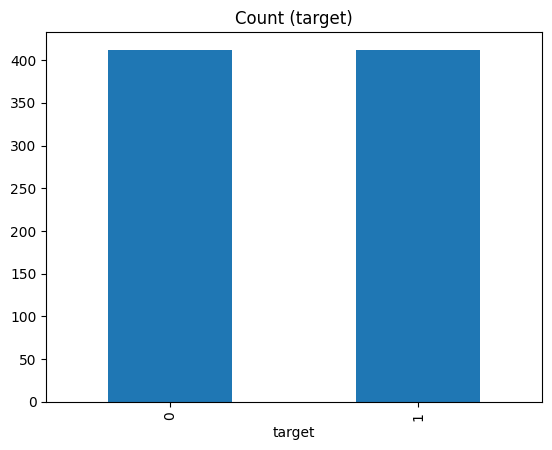

In [ ]:
df_class_0_under = df_class_0.sample(count_class_1) #it will randomly sample count_class_1 number of rows from the dataframe
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.target.value_counts())

df_test_under.target.value_counts().plot(kind='bar', title='Count (target)');

<h2 id="t6">Random over-sampling</h2>

Random over-sampling:
target
0    10446
1    10446
Name: count, dtype: int64


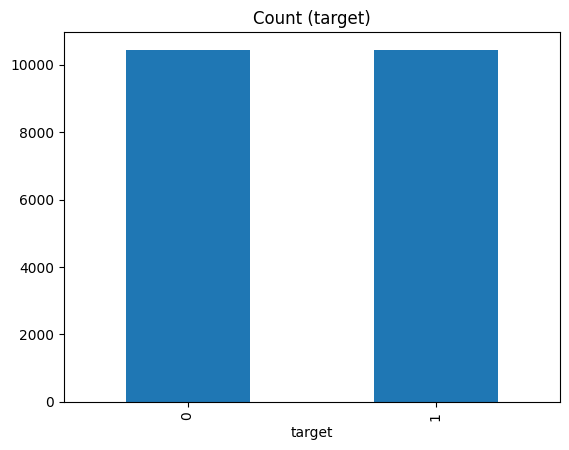

In [ ]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.target.value_counts())

df_test_over.target.value_counts().plot(kind='bar', title='Count (target)');

<h2 id="t7" style="margin-bottom: 18px">Python imbalanced-learn module</h2>

A number of more sophisticated resapling techniques have been proposed in the scientific literature.

For example, we can cluster the records of the majority class, and do the under-sampling by removing records from each cluster, thus seeking to preserve information. In over-sampling, instead of creating exact copies of the minority class records, we can introduce small variations into those copies, creating more diverse synthetic samples.

Let's apply some of these resampling techniques, using the Python library [imbalanced-learn](http://contrib.scikit-learn.org/imbalanced-learn/stable/). It is compatible with scikit-learn and is part of scikit-learn-contrib projects.

14-07-2025

# **Basics of NLP**

# **Text Processing**

# Sentence Tokenization

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')   #wordnet is going to be you corpus
nltk.download('stopwords') # to detect all the use less words
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
text = "Backgammon is one of the oldest known board games. Its history can be traced back nearly 5,000 years to archeological discoveries in the Middle East. It is a two player game where each player has fifteen checkers which move between twenty-four points according to the roll of two dice."
sentences = nltk.sent_tokenize(text)
for sentence in sentences:
    print(sentence)
    print()

Backgammon is one of the oldest known board games.

Its history can be traced back nearly 5,000 years to archeological discoveries in the Middle East.

It is a two player game where each player has fifteen checkers which move between twenty-four points according to the roll of two dice.



# Word Tokenization

In [ ]:
for sentence in sentences: # lopoping through every sentence
    words = nltk.word_tokenize(sentence) # we are extracting the words in the sentence
    print(words)
    print()

# dog, dogs, dog's, dogs'
# is, are, am => be
# drive, driven, drove => drive
# seen, saw, see => see

['Backgammon', 'is', 'one', 'of', 'the', 'oldest', 'known', 'board', 'games', '.']

['Its', 'history', 'can', 'be', 'traced', 'back', 'nearly', '5,000', 'years', 'to', 'archeological', 'discoveries', 'in', 'the', 'Middle', 'East', '.']

['It', 'is', 'a', 'two', 'player', 'game', 'where', 'each', 'player', 'has', 'fifteen', 'checkers', 'which', 'move', 'between', 'twenty-four', 'points', 'according', 'to', 'the', 'roll', 'of', 'two', 'dice', '.']



# Stemming and Lemmatization

Stems - chops off the ends of words
playing -> play
softly -> soft
saw

Lemmatization - Rule based approach where it will have a vocabulary using which

Playing -> play
played -> play
saw -> saw

In [ ]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('omw-1.4')

def compare_stemmer_and_lemmatizer(stemmer, lemmatizer, word, pos):
    """
      Print the results of stemmind and lemmitization using the passed stemmer, lematizer, word and pos (part of speech)
    """
    print("Stemmer:", stemmer.stem(word))
    print("Lemmatizer:", lemmatizer.lemmatize(word, pos))
    print()

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
compare_stemmer_and_lemmatizer(stemmer, lemmatizer, word = "seen", pos = wordnet.VERB)
compare_stemmer_and_lemmatizer(stemmer, lemmatizer, word = "drove", pos = wordnet.VERB)
compare_stemmer_and_lemmatizer(stemmer, lemmatizer, word = "better", pos = wordnet.ADJ)
compare_stemmer_and_lemmatizer(stemmer, lemmatizer, word = "improvised", pos = wordnet.VERB)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Stemmer: seen
Lemmatizer: see

Stemmer: drove
Lemmatizer: drive

Stemmer: better
Lemmatizer: good

Stemmer: improvis
Lemmatizer: improvise



# Stop Words

In [ ]:
from nltk.corpus import stopwords
import os
os.listdir('/root/nltk_data/corpora/stopwords/')
stop_words = set(stopwords.words("english"))
print(stop_words)
#"thus" in stop_words

{'if', 'who', 'during', 'on', 'how', "weren't", 'been', 'ma', 'itself', 'once', 'very', 'own', 'that', 'their', 'hers', 'myself', 't', 'for', 'when', "wasn't", 'against', 'above', 'hasn', 'the', 'had', 'o', 'both', 'no', "mightn't", "you'll", 'each', 'aren', "she'd", "aren't", "we'd", 'whom', 'won', 'isn', 'he', 'into', 'because', 'too', 'where', 'does', 'up', 'over', 'an', "he's", 'needn', 'before', 'll', 'off', 've', "i'll", 'and', 'she', 'same', 'have', 'not', 'are', 'what', 'being', 'having', 'while', 'all', 'herself', 're', "she's", 'them', "we're", 'any', 'here', 'didn', 'than', 'this', 'yours', 'has', "should've", 'haven', 'your', 'yourself', 'did', 'y', 'can', 'some', 'or', 'mustn', 'so', 's', 'through', 'just', 'ain', "mustn't", 'most', 'doesn', "it'd", 'do', "don't", 'they', "it's", 'in', 'between', "hadn't", "hasn't", 'theirs', "doesn't", 'why', 'his', "we've", 'should', "couldn't", 'those', 'these', 'until', 'below', 'it', 'only', 'few', 'shan', 'themselves', "you'd", 'her'

In [ ]:
stop_words = set(stopwords.words("english"))
sentence = "Backgammon is one of the oldest known board games."

words = nltk.word_tokenize(sentence)
words
without_stop_words = [word for word in words if not word in stop_words]
print(without_stop_words)

['Backgammon', 'one', 'oldest', 'known', 'board', 'games', '.']


In [ ]:
'this' in stop_words

True

In [ ]:
lemmatizer.lemmatize("games", wordnet.NOUN)

'game'

# Punctuation Removal

In [ ]:
# This is an alternate way to word tokenize - advantage : it will remove the punctuation marks

from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer('\w+')
# \w -> word character[A-Za-z0-9_]
# \w+ -> whenever u see a word character, keep continuing
tokenizer.tokenize('Eight-seven miles to go, yet. Onward!')

['Eight', 'seven', 'miles', 'to', 'go', 'yet', 'Onward']

### Part of Speech Tagging

In [ ]:
sentence = "Backgammon is one of the oldest known board games."

words = nltk.word_tokenize(sentence) #tokenizes the sentence into words
nltk.download('averaged_perceptron_tagger_eng')
tagged = nltk.tag.pos_tag(words)  # nlt.tag.pos_tag(list_of_words)
print(tagged)#evalletlet me fix all

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


[('Backgammon', 'NNP'), ('is', 'VBZ'), ('one', 'CD'), ('of', 'IN'), ('the', 'DT'), ('oldest', 'JJS'), ('known', 'VBN'), ('board', 'NN'), ('games', 'NNS'), ('.', '.')]


In [ ]:
nltk.download('tagsets_json')
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

[nltk_data] Downloading package tagsets_json to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets_json.zip.


In [ ]:
#how to convert the detailed tag to the basic POS?

# Bag of Words

In [ ]:
#documents = ["I like this movie, it's funny.","I hate this movie.","This was awesome! I like it. Like the screenplay.","Nice one. I love it."]
documents = ['good movie good screenplay', 'good movie', 'bad movie sleep']

In [ ]:
# Import the libraries we need
from sklearn.feature_extraction.text import CountVectorizer # give you the bag of words model
import pandas as pd

# Step 2. Design the Vocabulary
# The default token pattern removes tokens of a single character. That's why we don't have the "I" and "s" tokens in the output
count_vectorizer = CountVectorizer(binary = False)

# Step 3. Create the Bag-of-Words Model
bag_of_words = count_vectorizer.fit_transform(documents) # fit - design the vocbulary and transform will convert the text into numbers based on the presence of the word

# Show the Bag-of-Words Model as a pandas DataFrame
feature_names = count_vectorizer.get_feature_names_out()
pd.DataFrame(bag_of_words.toarray(), columns = feature_names)

bad  good  movie  screenplay  sleep
0    0     2      1           1      0
1    0     1      1           0      0
2    1     0      1           0      1

### n - gram Approach

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Step 2. Design the Vocabulary
# The default token pattern removes tokens of a single character. That's why we don't have the "I" and "s" tokens in the output
count_vectorizer = CountVectorizer(ngram_range = (2,2), binary=False)

# Step 3. Create the Bag-of-Words Model
bag_of_words = count_vectorizer.fit_transform(documents) # fit - design the vocbulary and transform will convert the text into numbers based on the presence of the word

# Show the Bag-of-Words Model as a pandas DataFrame
feature_names = count_vectorizer.get_feature_names_out()
pd.DataFrame(bag_of_words.toarray(), columns = feature_names)

bad movie  good movie  good screenplay  movie good  movie sleep
0          0           1                1           1            0
1          0           1                0           0            0
2          1           0                0           0            1

# TF-IDF

In [ ]:
#documents = ["I like this movie, it's funny.","I hate this movie.","This was awesome! I like it. Like the screenplay.","Nice one. I love it."]
documents = ['good movie good screenplay', 'good movie', 'bad movie sleep']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tfidf_vectorizer = TfidfVectorizer() # Intialise the model
values = tfidf_vectorizer.fit_transform(documents)

# Show the Model as a pandas DataFrame
feature_names = tfidf_vectorizer.get_feature_names_out()
pd.DataFrame(values.toarray(), columns = feature_names)

bad      good     movie  screenplay     sleep
0  0.000000  0.794803  0.308618    0.522535  0.000000
1  0.000000  0.789807  0.613356    0.000000  0.000000
2  0.652491  0.000000  0.385372    0.000000  0.652491

15-07-2025